<a href="https://www.kaggle.com/code/irdazh/l23-sso23?scriptVersionId=243581920" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Student Dropout Risk Classification
- Authors: Gian Luky S. & Daud M. Azhari
- Date: November 2023

Apply multiclass classification to identify student with high dropout risk using. Next, we also apply threshold moving to focus on one of the class, which is dropout, to identify the key predictors and devise a strategy based on model outputs.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno

In [2]:
df0 = pd.read_csv("/kaggle/input/lomba-23/DataSSO2023 (1).csv")
display(df0.head(), df0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application order                               4424 non-null   int64  
 2   Daytime/evening attendance	                     4424 non-null   int64  
 3   Previous qualification (grade)                  4424 non-null   float64
 4   Admission grade                                 4424 non-null   float64
 5   Displaced                                       4424 non-null   int64  
 6   Educational special needs                       4424 non-null   int64  
 7   Debtor                                          4424 non-null   int64  
 8   Tuition fees up to date                         4424 non-null   int64  
 9   Gender                                   

,Marital status,Application order,Daytime/evening attendance\t,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,5,1,122.0,127.3,1,0,0,1,1,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,1,1,160.0,142.5,1,0,0,0,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,5,1,122.0,124.8,1,0,0,0,1,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,2,1,122.0,119.6,1,0,0,1,0,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,1,0,100.0,141.5,0,0,0,1,0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Marital status                    4424 non-null   int64  
 1   Application order                 4424 non-null   int64  
 2   Daytime/evening attendance	       4424 non-null   int64  
 3   Previous qualification (grade)    4424 non-null   float64
 4   Admission grade                   4424 non-null   float64
 5   Displaced                         4424 non-null   int64  
 6   Educational special needs         4424 non-null   int64  
 7   Debtor                            4424 non-null   int64  
 8   Tuition fees up to date           4424 non-null   int64  
 9   Gender                            4424 non-null   int64  
 10  Scholarship holder                4424 non-null   int64  
 11  Age at enrollment                 4424 non-null   int64  
 12  Intern

,Marital status,Application order,Daytime/evening attendance\t,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,...,CU 2nd sem (credited),CU 2nd sem (enrolled),CU 2nd sem (evaluations),CU 2nd sem (approved),CU 2nd sem (grade),CU 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,5,1,122.0,127.3,1,0,0,1,1,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,1,1,160.0,142.5,1,0,0,0,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,5,1,122.0,124.8,1,0,0,0,1,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,2,1,122.0,119.6,1,0,0,1,0,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,1,0,100.0,141.5,0,0,0,1,0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


None

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


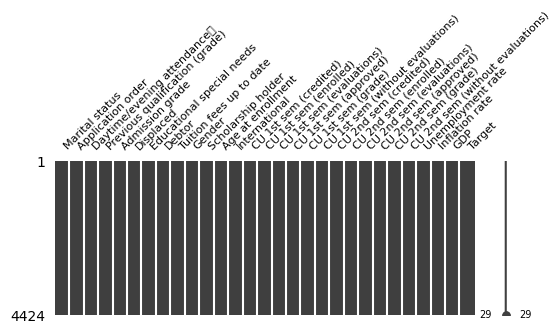

In [3]:
df1 = df0.copy()
df1.rename(columns=lambda col: col.replace("Curricular units", "CU"), inplace=True)
display(df1.head(), df1.info())

missingno.matrix(df1, figsize=(6,2), fontsize=8)
plt.show()

### Viz.
- All viz will be using 10k samples
- Well, kinda representative.

In [4]:
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler
df1.shape

(4424, 29)

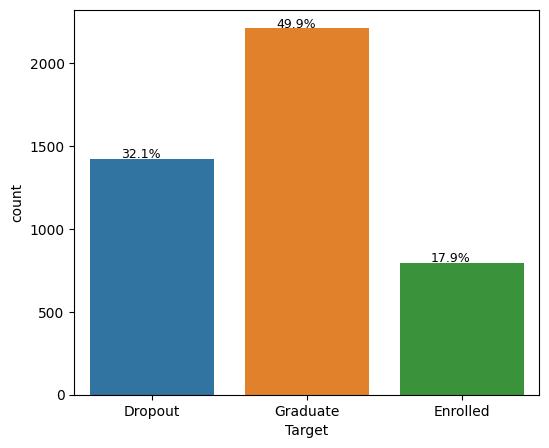

In [5]:
def without_hue(plot, feature, sz = 10):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.2
        y = p.get_y() + p.get_height() + 5
        ax.annotate(percentage, (x, y), size = sz)
    plt.show()


plt.figure(figsize=(6,5))
ax = sns.countplot(x="Target", data=df1)
without_hue(ax, df1.Target, 9)

In [6]:
var1 = df1.columns.to_list()
var1.remove("Target")
var1

print([df1[j].nunique() for j in var1])

[6, 8, 2, 101, 620, 2, 2, 2, 2, 2, 2, 46, 2, 21, 23, 35, 23, 805, 11, 19, 22, 30, 20, 786, 10, 10, 9, 10]


/tmp/ipykernel_20/736125172.py:12: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_20/736125172.py:26: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


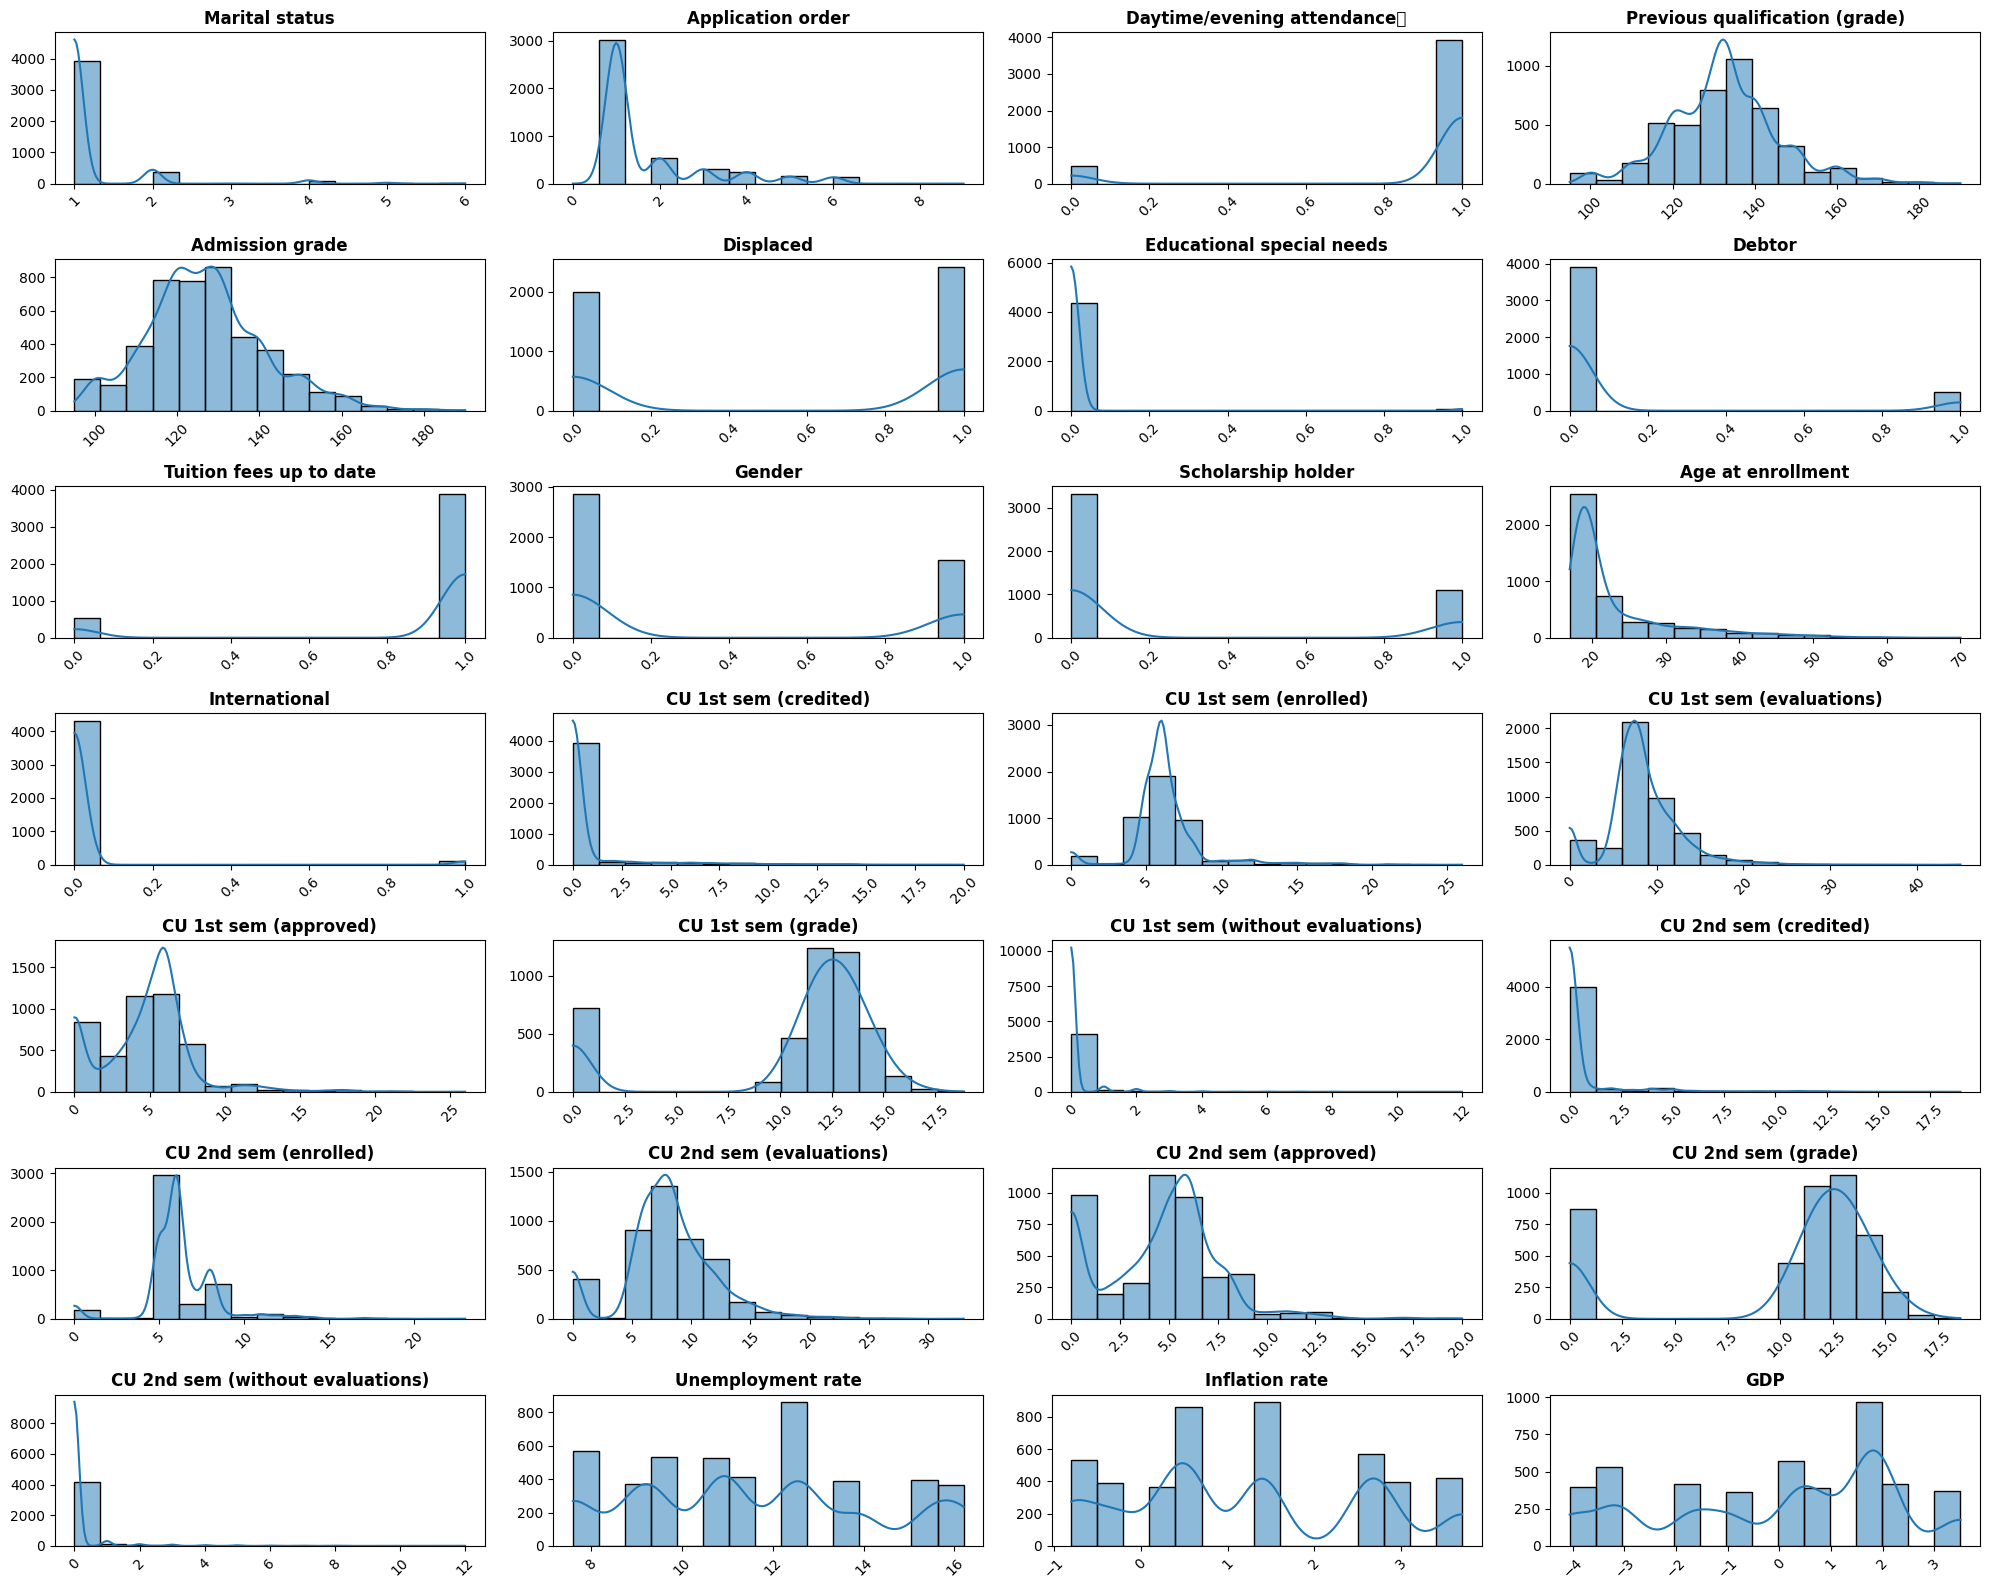

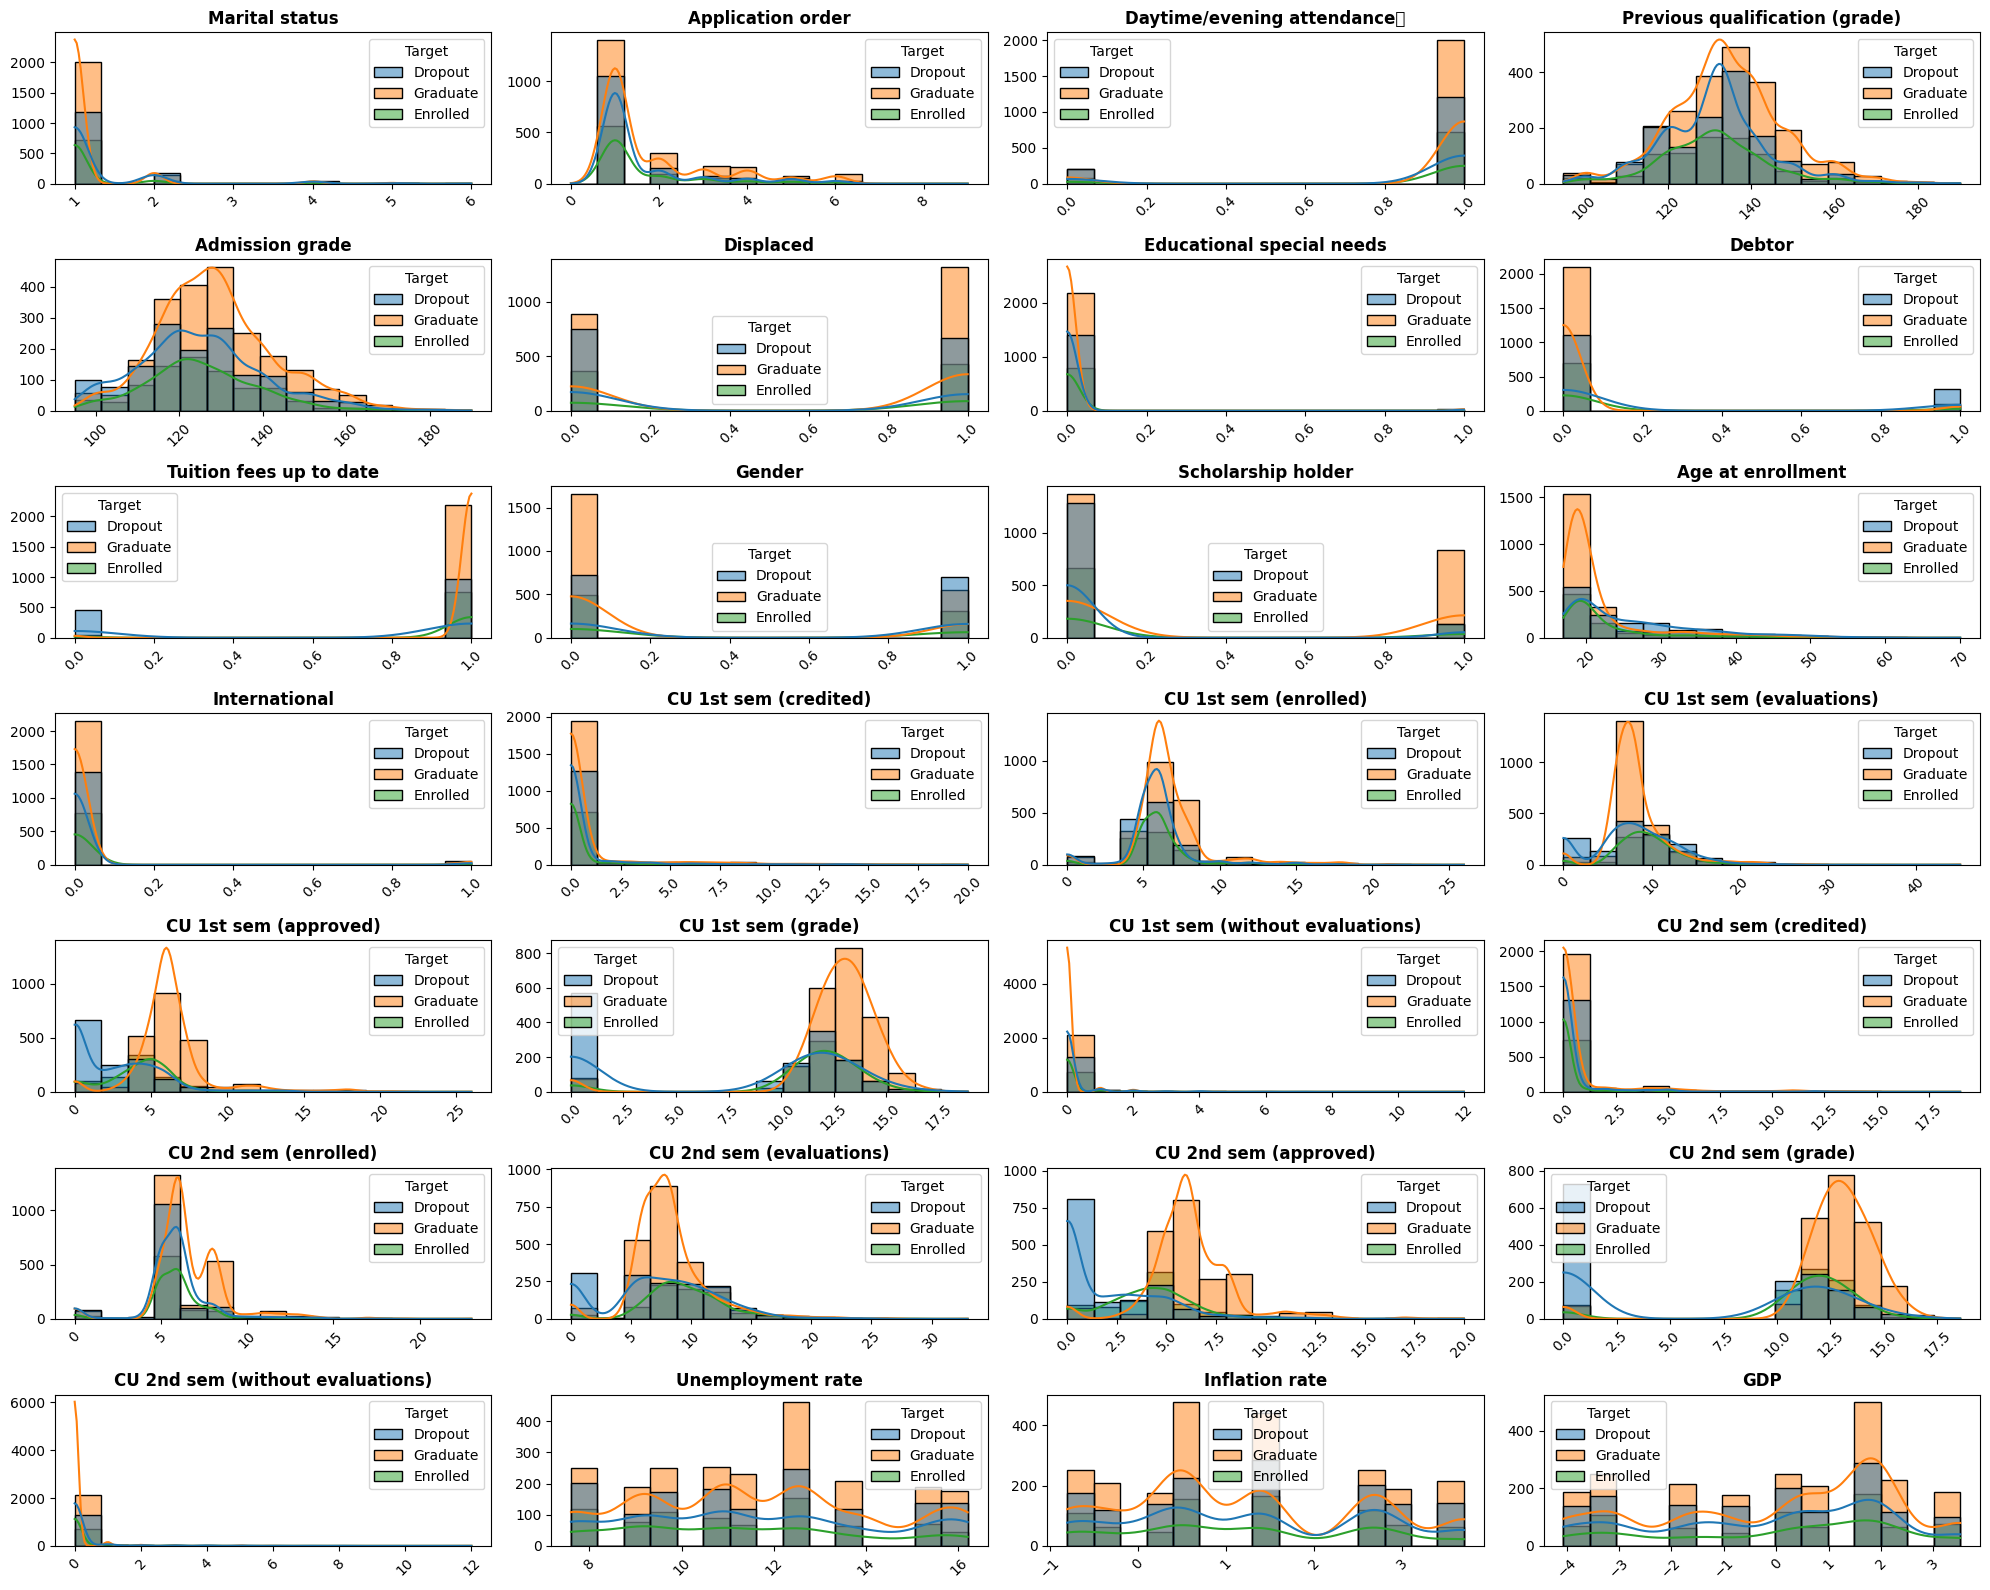

In [7]:
fig, axes = plt.subplots(7, 4, figsize=(20, 16), sharey=False)
axes = axes.ravel()

for i, var in enumerate(var1):
    sns.histplot(data=df1, x=var, ax=axes[i], kde=True, bins=15)
    axes[i].set_title(f'{var}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel(None)
    axes[i].set_xlabel(None)
    axes[i].tick_params(axis='x', rotation=45)
    pass

plt.tight_layout()


fig, axes = plt.subplots(7, 4, figsize=(20, 16), sharey=False)
axes = axes.ravel()

for i, var in enumerate(var1):
    sns.histplot(data=df1, x=var, ax=axes[i], kde=True, bins=15, hue="Target")
    axes[i].set_title(f'{var}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel(None)
    axes[i].set_xlabel(None)
    axes[i].tick_params(axis='x', rotation=45)
    pass

plt.tight_layout()

/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


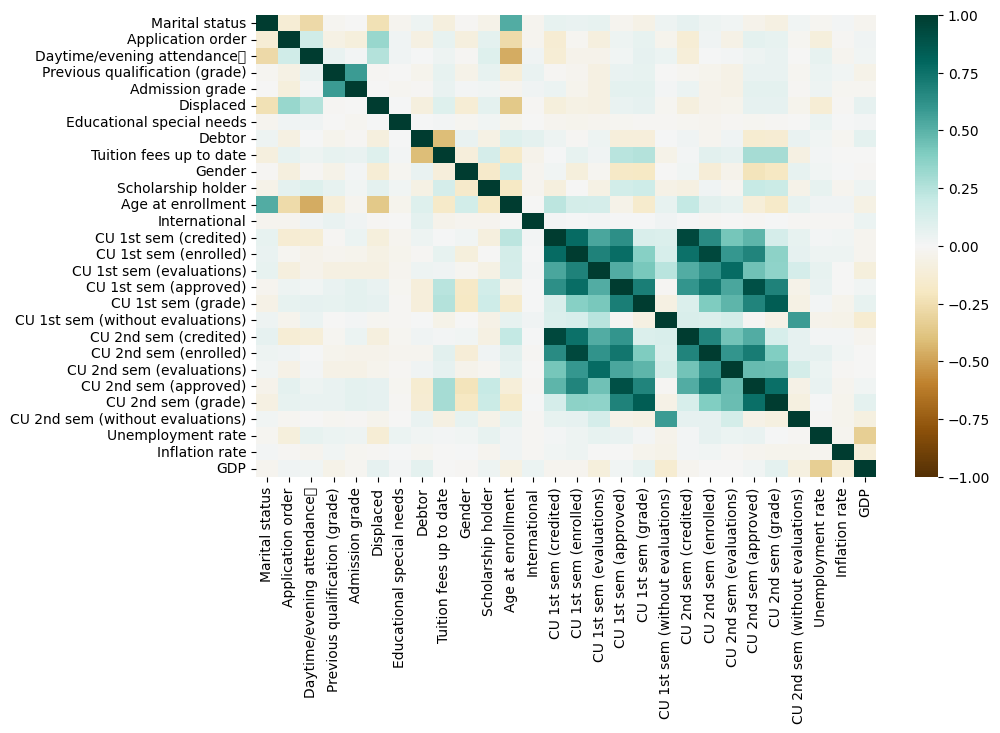

In [8]:
corsam = df1[var1].corr()
fig, ax = plt.subplots(figsize = (10, 6))
sns.heatmap(ax = ax, vmin=-1, vmax=1, data = corsam, annot = None, cmap="BrBG")
ax.set_yticklabels(corsam,rotation = 0)
plt.show()

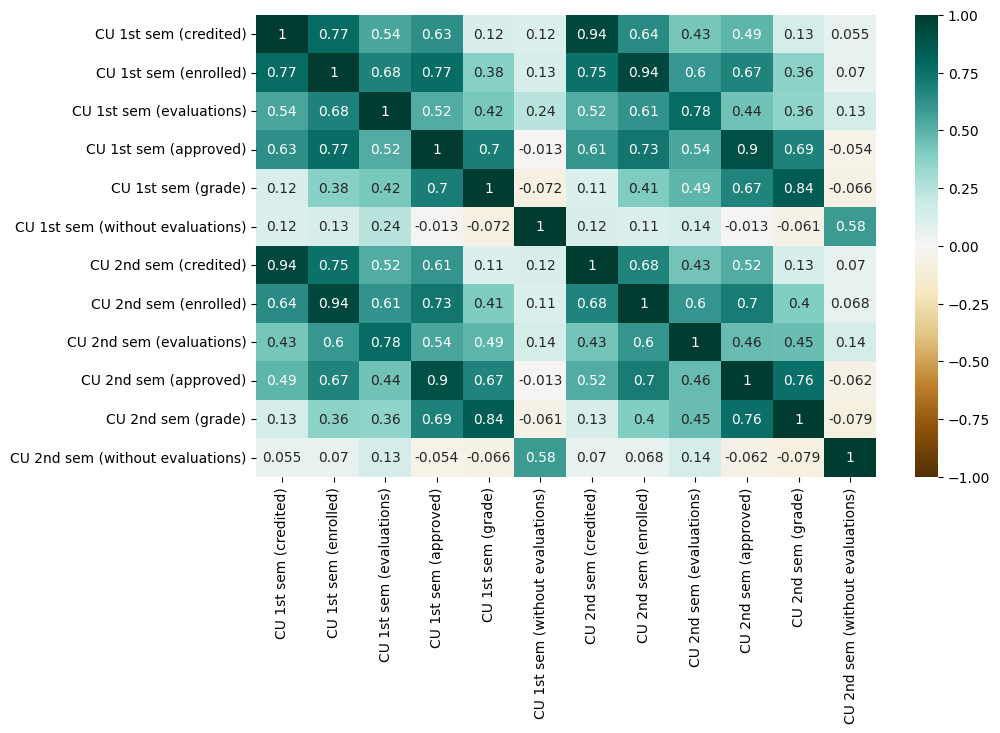

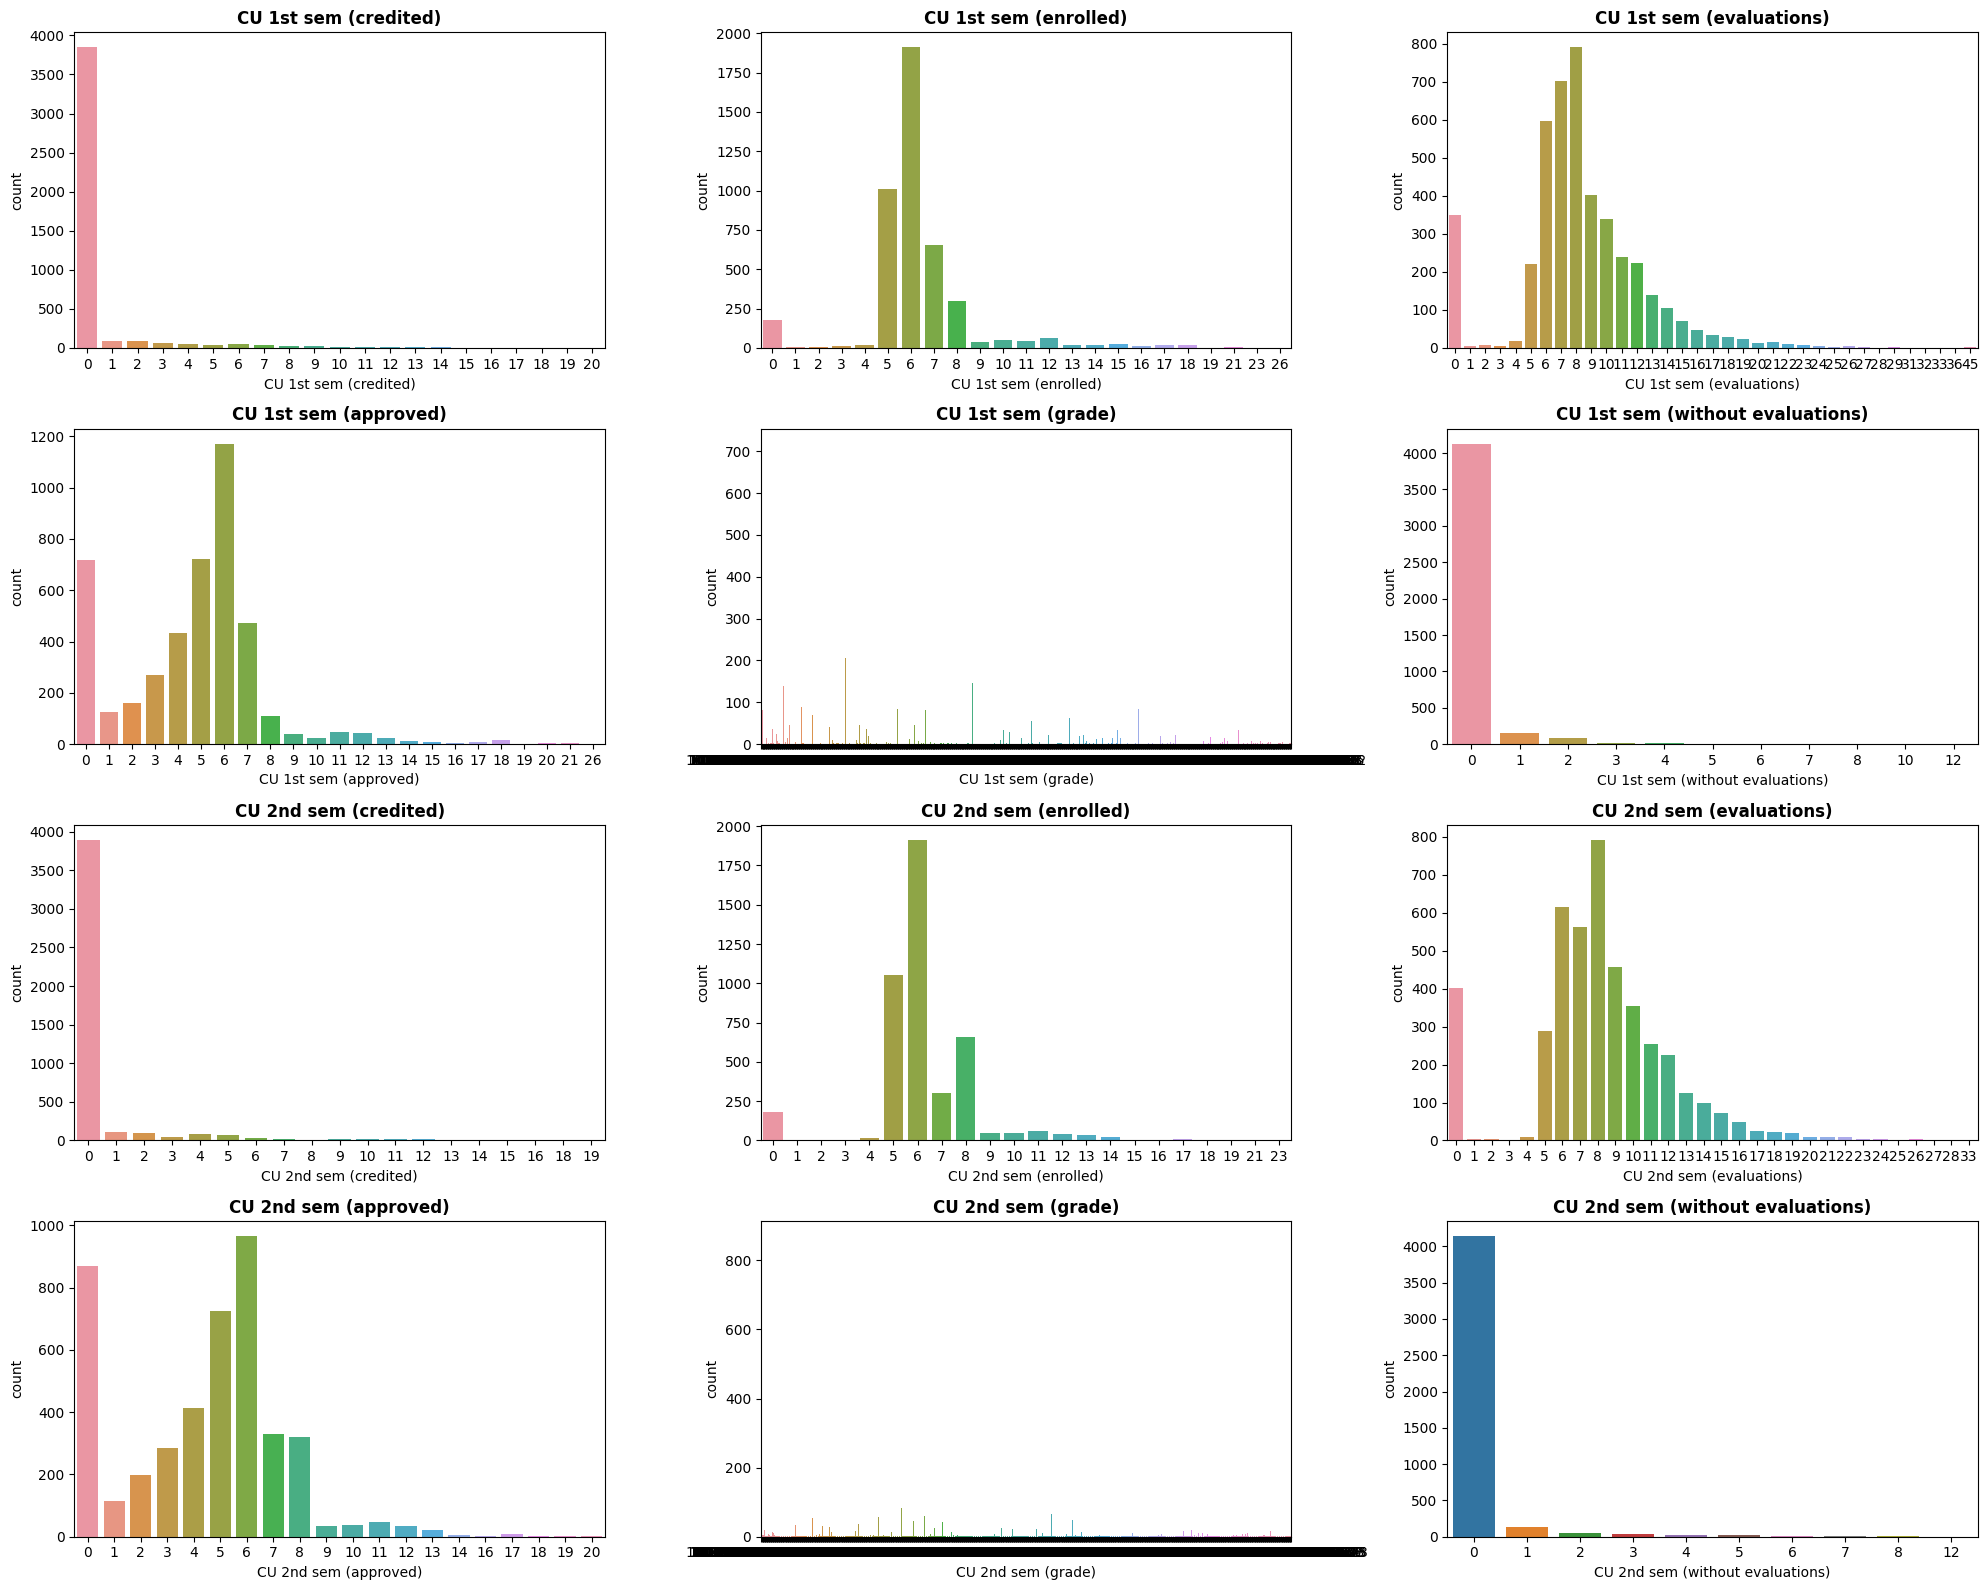

In [9]:
var2 = df1.filter(like="CU").columns.to_list()

corsam = df1[var2].corr()
fig, ax = plt.subplots(figsize = (10, 6))
sns.heatmap(ax = ax, vmin=-1, vmax=1, data = corsam, annot = True, cmap="BrBG")
ax.set_yticklabels(corsam,rotation = 0)
plt.show()


fig, axes = plt.subplots(4, 3, figsize=(20, 16), sharey=False)
axes = axes.ravel()

for i, var in enumerate(var2):
    sns.countplot(x=var, data=df1, ax=axes[i])
    axes[i].set_title(f'{var}', fontsize=12, fontweight='bold')
    pass

plt.tight_layout()
plt.show()

In [10]:
# # using sample to viz, 20%
# random.seed(123)
# rdsam = random.sample(sorted(df1.index), 10)
# sampel = df1.loc[rdsam,:] 

# sns.pairplot(sampel, hue="Target")

/tmp/ipykernel_20/4088953571.py:12: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


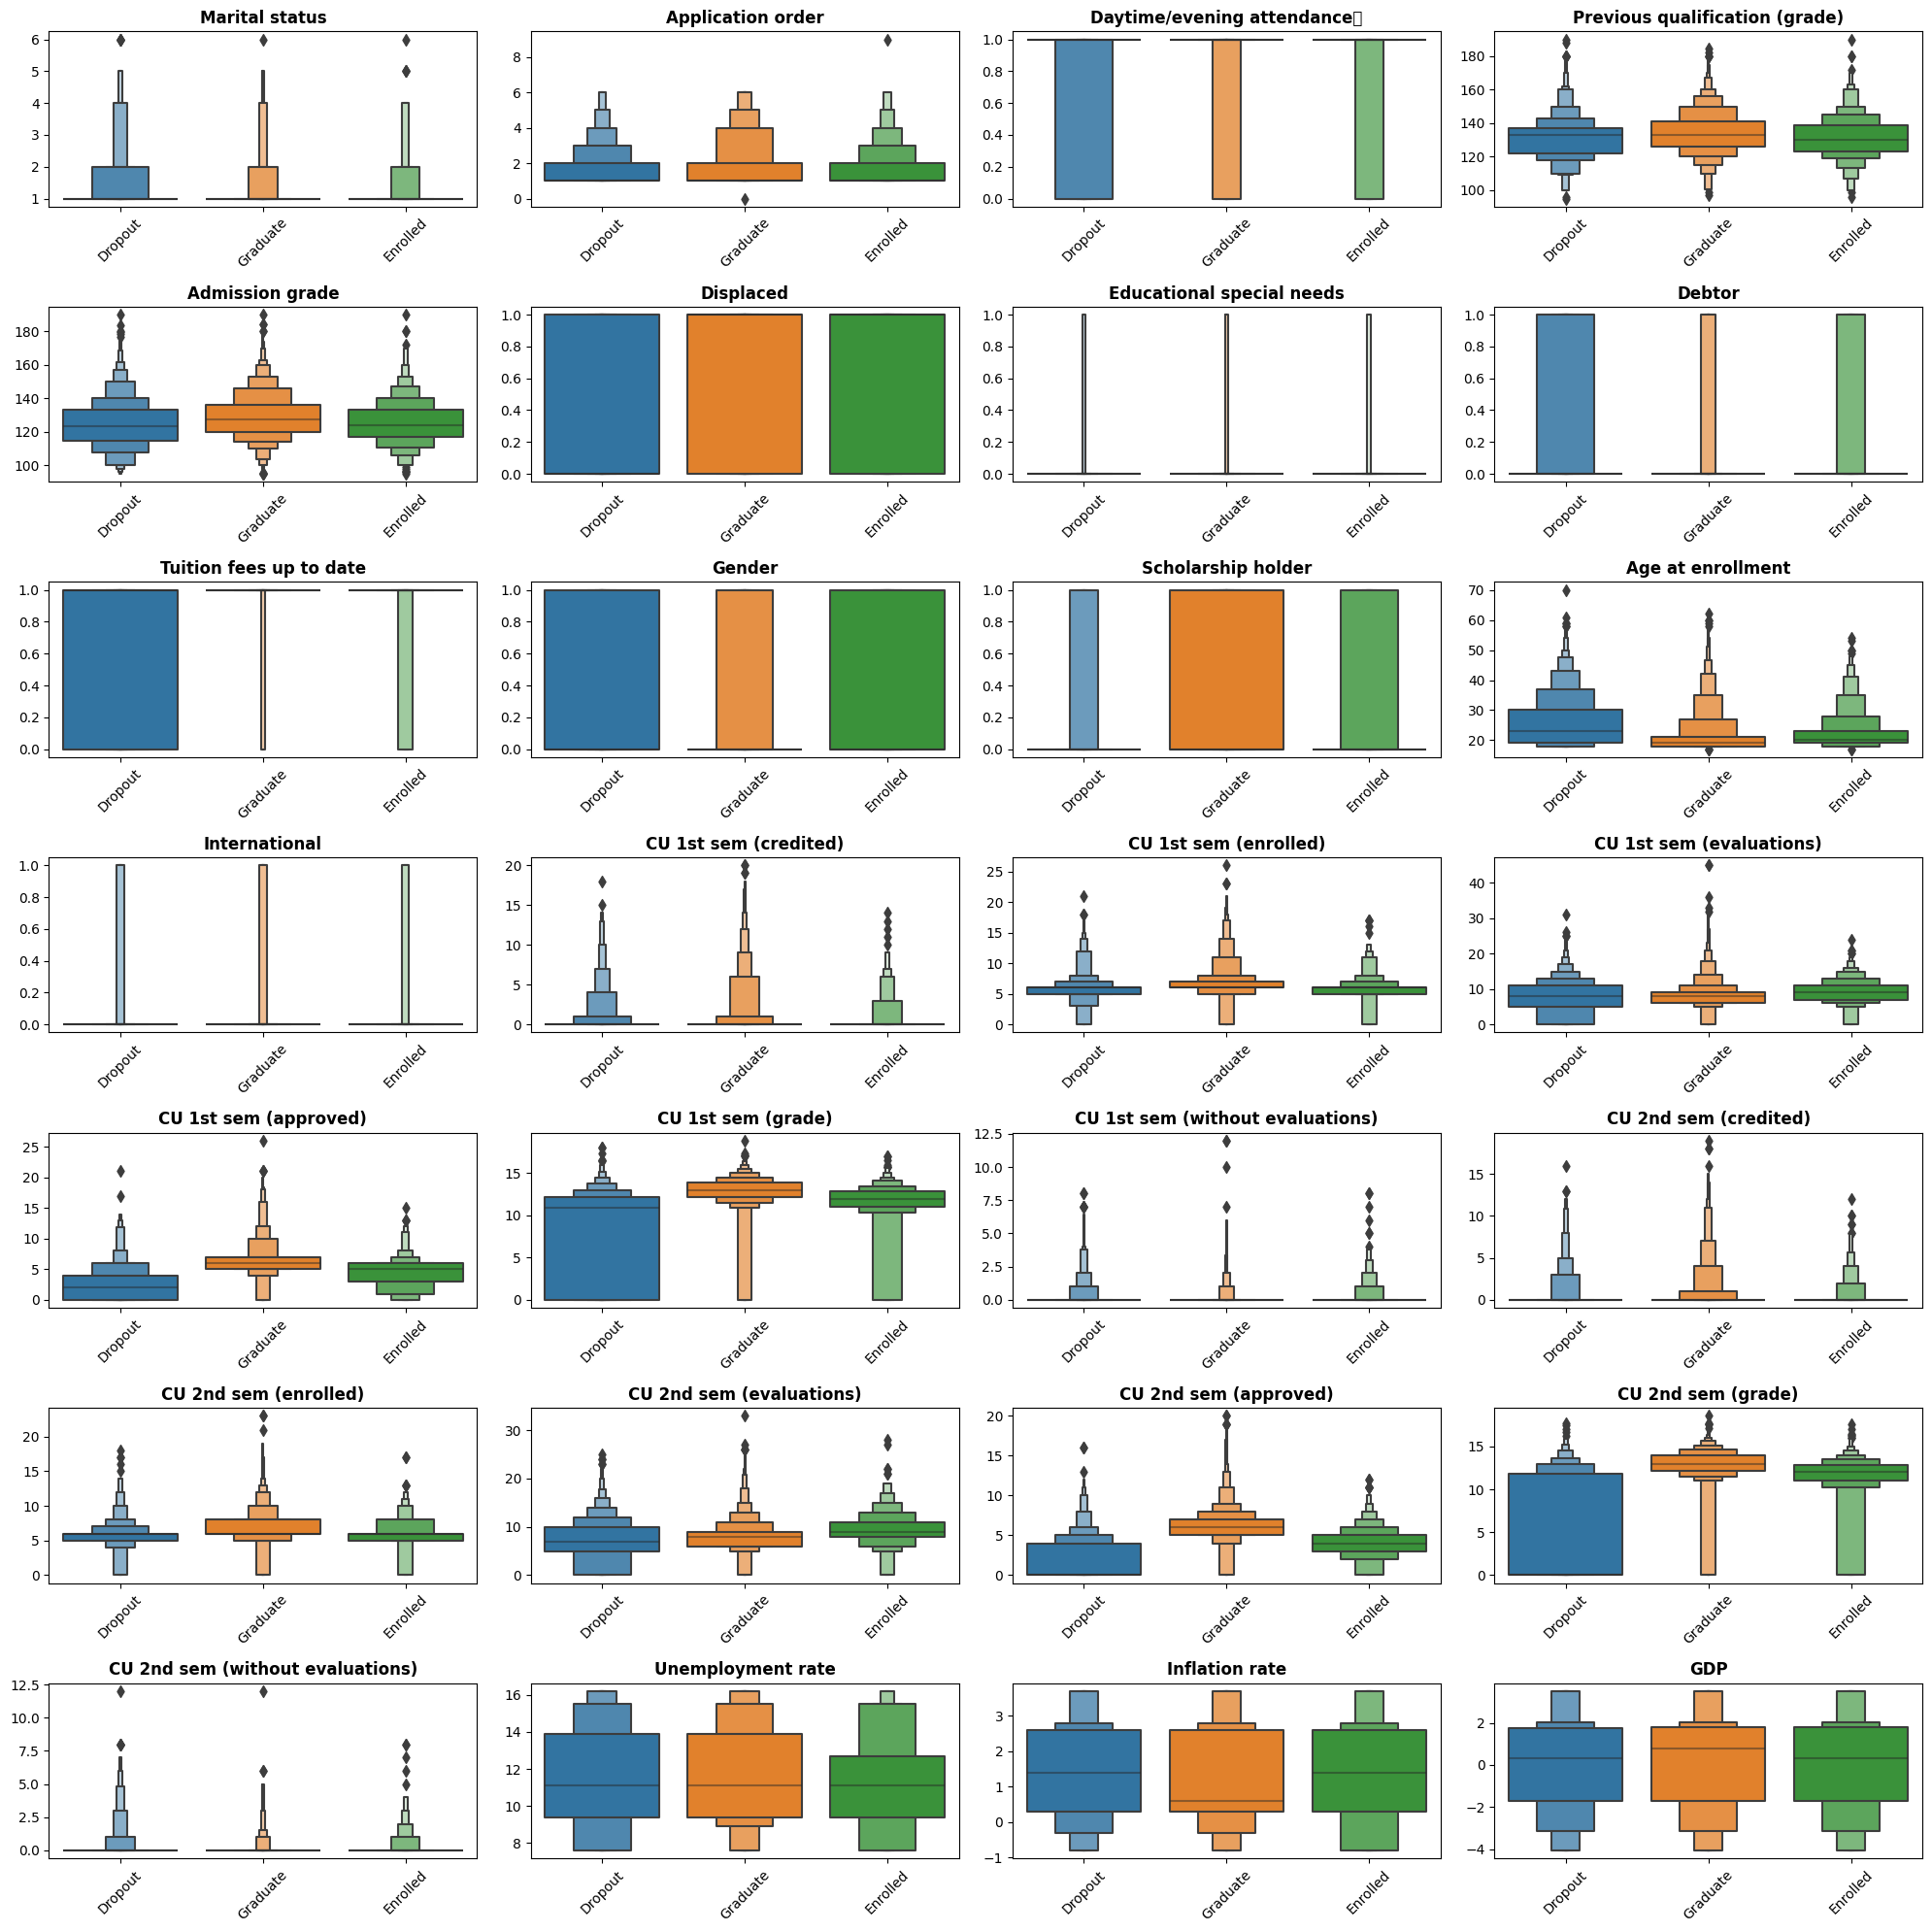

In [11]:
fig, axes = plt.subplots(7, 4, figsize=(20, 20), sharey=False)
axes = axes.ravel()

for i, var in enumerate(var1):
    sns.boxenplot(data=df1, y=var, x="Target", ax=axes[i])
    axes[i].set_title(f'{var}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(None)
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', rotation=45)
    pass

plt.tight_layout()

In [12]:
from pandas import CategoricalDtype
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split

# HEHE
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score, RepeatedStratifiedKFold, RepeatedKFold
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer, OrdinalEncoder, OneHotEncoder, RobustScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, recall_score, auc, roc_auc_score
from sklearn.metrics import f1_score, balanced_accuracy_score, fbeta_score, precision_recall_curve, roc_curve

### What Else?
- Basic Model, Tuning
    * LR (no)
    * RC (no use)
    * RF
    * XG 
    * HG
    * LG
- Eak

In [13]:
# 0 bad terus urut.
df2 = df1.copy()
df2["Target"].replace(df2["Target"].unique(), [0,2,1], inplace=True)
df2["Target"].value_counts()

Target
2    2209
0    1421
1     794
Name: count, dtype: int64

In [14]:
X1 = df2.copy()

# Splitting Data
y1 = X1.pop("Target")
Xtr1, Xte1, ytr1, yte1 = train_test_split(X1, y1, test_size = 0.2, random_state = 0, stratify=y1)
display(Xtr1.head(), Xte1.tail())

X1 = Xtr1.copy()
y1 = ytr1.copy()

,Marital status,Application order,Daytime/evening attendance\t,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,...,CU 1st sem (without evaluations),CU 2nd sem (credited),CU 2nd sem (enrolled),CU 2nd sem (evaluations),CU 2nd sem (approved),CU 2nd sem (grade),CU 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
418,1,4,1,136.0,126.3,1,0,0,1,0,...,0,0,7,7,6,11.6,0,7.6,2.6,0.32
3666,2,1,1,170.0,148.5,0,0,0,1,1,...,0,5,7,7,5,13.4,0,9.4,-0.8,-3.12
1522,1,1,1,130.0,101.3,1,0,0,1,1,...,0,0,6,17,0,0.0,0,12.4,0.5,1.79
2192,1,1,1,130.0,154.9,0,0,1,0,1,...,0,0,6,10,4,16.0,0,8.9,1.4,3.51
3463,1,1,1,160.0,146.0,1,0,0,1,0,...,0,0,6,10,5,11.8,0,9.4,-0.8,-3.12


,Marital status,Application order,Daytime/evening attendance\t,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,...,CU 1st sem (without evaluations),CU 2nd sem (credited),CU 2nd sem (enrolled),CU 2nd sem (evaluations),CU 2nd sem (approved),CU 2nd sem (grade),CU 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
2885,1,1,0,130.0,147.5,0,0,0,1,0,...,0,6,8,8,8,13.500000,0,12.7,3.7,-1.70
2653,2,2,1,133.1,110.0,0,0,0,1,1,...,1,0,5,5,0,0.000000,0,9.4,-0.8,-3.12
4247,2,2,0,100.0,100.0,0,0,1,1,0,...,0,0,6,7,6,11.000000,0,7.6,2.6,0.32
1274,1,1,0,120.0,120.0,0,0,0,1,0,...,0,0,5,8,5,12.333333,0,12.4,0.5,1.79
1732,2,1,1,120.0,145.4,0,0,1,1,1,...,0,0,5,5,2,12.500000,0,16.2,0.3,-0.92


In [15]:
# Linear and Trees
# for baseline only, wont do any optimization.
from sklearn.linear_model import LogisticRegression, RidgeClassifier, ElasticNet, ElasticNetCV

# eak. only LGBM can do category
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier

# FOLD
rkf = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=0)

# metric eval
from sklearn import metrics

### Base Modeling

In [16]:
X1 = Xtr1.copy()
y1 = ytr1.copy()

# Define a list of regression models
models = [
    LogisticRegression(random_state=0, max_iter=100000, multi_class='multinomial'),
#     ElasticNet(random_state=0, max_iter=10000),
    
    RandomForestClassifier(random_state=0),
    XGBClassifier(random_state=0),
    HistGradientBoostingClassifier(random_state=0),
    LGBMClassifier(random_state=0),
]

res1 = []

for model in models:
    pipa = imbpipeline(steps=[
#         ("preprocess", pre_1),
        ("clf", model)
    ])
    
    # weit, how to do? try append for dataframe
    grid_search = GridSearchCV(estimator=pipa, param_grid = {}, cv=rkf, 
                               scoring={"f1M": "f1_macro","acc":"accuracy", "roco": "roc_auc_ovo", "rocr": "roc_auc_ovr"}, 
                               refit="roco", verbose=1)
    
    grid_search.fit(X1, y1)
    
    display(pd.DataFrame(grid_search.cv_results_).filter(regex='^mean',axis=1))
    
    # Save the model's performance metrics in a dictionary
    result = {
        'Model': type(model).__name__,
        'Score': grid_search.best_score_
    }
    
    # Append the dictionary to the results list
    res1.append(result)

Fitting 6 folds for each of 1 candidates, totalling 6 fits


,mean_fit_time,mean_score_time,mean_test_f1M,mean_test_acc,mean_test_roco,mean_test_rocr
0,2.092083,0.017995,0.674901,0.764197,0.859413,0.875385


Fitting 6 folds for each of 1 candidates, totalling 6 fits


,mean_fit_time,mean_score_time,mean_test_f1M,mean_test_acc,mean_test_roco,mean_test_rocr
0,0.500129,0.072863,0.673948,0.76123,0.861343,0.877187


Fitting 6 folds for each of 1 candidates, totalling 6 fits


,mean_fit_time,mean_score_time,mean_test_f1M,mean_test_acc,mean_test_roco,mean_test_rocr
0,0.840744,0.031528,0.682959,0.757275,0.85587,0.870773


Fitting 6 folds for each of 1 candidates, totalling 6 fits


,mean_fit_time,mean_score_time,mean_test_f1M,mean_test_acc,mean_test_roco,mean_test_rocr
0,1.487302,0.064335,0.678585,0.755863,0.855767,0.870747


Fitting 6 folds for each of 1 candidates, totalling 6 fits


,mean_fit_time,mean_score_time,mean_test_f1M,mean_test_acc,mean_test_roco,mean_test_rocr
0,2.299262,0.039464,0.680621,0.757557,0.857614,0.872355


In [17]:
# kita pake roc auc one vs one --> insensitive to class imbalanced
# print(classification_report(grid_search.predict(Xte1), yte1))
res1

[{'Model': 'LogisticRegression', 'Score': 0.8594131154575382},
 {'Model': 'RandomForestClassifier', 'Score': 0.8613433129258025},
 {'Model': 'XGBClassifier', 'Score': 0.8558699829233527},
 {'Model': 'HistGradientBoostingClassifier', 'Score': 0.8557665381709602},
 {'Model': 'LGBMClassifier', 'Score': 0.8576143949099088}]

### What to DO?
- Ohh, gitu, okei
- Pemilihan model pake ROC AUC one vs one kinda imbalanced so okey
-

## XGB

In [18]:
xg1 = imbpipeline(steps=[
    ("clf", XGBClassifier(random_state=0))
])


param_grid = {
    'clf__n_estimators': [100],
    'clf__learning_rate': [0.05], 
}


grid_xg1 = GridSearchCV(estimator=xg1, param_grid=param_grid, cv=rkf, 
                        scoring={"f1M": "f1_macro","acc":"accuracy", "roco": "roc_auc_ovo", "rocr": "roc_auc_ovr"}, 
                        verbose = 3, refit="roco")


# Melakukan tuning hyperparameter
grid_xg1.fit(X1, y1)


# Mendapatkan model terbaik
print("Best Parameter", grid_xg1.best_params_)
print("Best Scorer", grid_xg1.best_score_)

Fitting 6 folds for each of 1 candidates, totalling 6 fits
[CV 1/6] END clf__learning_rate=0.05, clf__n_estimators=100; acc: (test=0.780) f1M: (test=0.699) roco: (test=0.887) rocr: (test=0.902) total time=   1.5s
[CV 2/6] END clf__learning_rate=0.05, clf__n_estimators=100; acc: (test=0.748) f1M: (test=0.669) roco: (test=0.852) rocr: (test=0.867) total time=   1.5s
[CV 3/6] END clf__learning_rate=0.05, clf__n_estimators=100; acc: (test=0.758) f1M: (test=0.671) roco: (test=0.855) rocr: (test=0.871) total time=   1.5s
[CV 4/6] END clf__learning_rate=0.05, clf__n_estimators=100; acc: (test=0.764) f1M: (test=0.684) roco: (test=0.861) rocr: (test=0.877) total time=   1.5s
[CV 5/6] END clf__learning_rate=0.05, clf__n_estimators=100; acc: (test=0.768) f1M: (test=0.693) roco: (test=0.867) rocr: (test=0.881) total time=   1.5s
[CV 6/6] END clf__learning_rate=0.05, clf__n_estimators=100; acc: (test=0.749) f1M: (test=0.667) roco: (test=0.859) rocr: (test=0.874) total time=   1.5s
Best Parameter {'

0    0.863575
Name: mean_test_roco, dtype: float64


,mean_fit_time,mean_score_time,mean_test_f1M,mean_test_acc,mean_test_roco,mean_test_rocr
0,1.451427,0.039342,0.680471,0.761089,0.863575,0.8787


{'objective': 'multi:softprob',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.05,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 0,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       264
           1       0.36      0.51      0.42       112
           2       0.91      0.79      0.85       509

    accuracy                           0.76       885
   macro avg       0.68      0.71      0.68       885
weighted avg       0.80      0.76      0.78       885

[[215  34  15]
 [ 32  57  23]
 [ 37  68 404]]


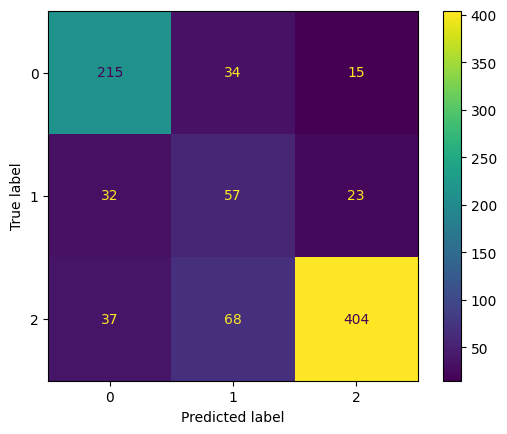

In [19]:
print(pd.DataFrame(grid_xg1.cv_results_)["mean_test_roco"].sort_values(ascending=False).head(7))
display(pd.DataFrame(grid_xg1.cv_results_).sort_values("mean_test_roco", ascending=False).head().filter(regex='^mean',axis=1))

display(grid_xg1.best_estimator_.get_params()["clf"].get_params())

print(classification_report(grid_xg1.predict(Xte1), yte1))

cm1 = metrics.confusion_matrix(grid_xg1.predict(Xte1), yte1)
print(cm1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = [0,1,2])

cm_display.plot()
plt.show()

In [20]:
plt.show()

> ## Random Forest

In [21]:
rf1 = imbpipeline(steps=[
    ("clf", RandomForestClassifier(random_state=0,))
])


param_grid = {
    'clf__n_estimators': [800],
    'clf__max_features':["log2"],
    'clf__min_samples_leaf': [1],
    'clf__min_samples_split': [3]
    
}


# grid_rf1 = GridSearchCV(estimator=rf1, param_grid=param_grid, cv=rkf, 
#                          scoring={"roc": "roc_auc_ovo"}, 
#                          verbose = 3, refit="roc")

grid_rf1 = RandomizedSearchCV(estimator=rf1, param_distributions=param_grid, cv=rkf, 
                                scoring={"f1M": "f1_macro","acc":"accuracy", "roco": "roc_auc_ovo", "rocr": "roc_auc_ovr"}, 
                              verbose = 3, refit="roco", n_iter=20)


# Melakukan tuning hyperparameter
grid_rf1.fit(X1, y1)


# Mendapatkan model terbaik
print("Best Parameter", grid_rf1.best_params_)
print("Best Scorer", grid_rf1.best_score_)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits
[CV 1/6] END clf__max_features=log2, clf__min_samples_leaf=1, clf__min_samples_split=3, clf__n_estimators=800; acc: (test=0.782) f1M: (test=0.695) roco: (test=0.886) rocr: (test=0.902) total time=   4.0s
[CV 2/6] END clf__max_features=log2, clf__min_samples_leaf=1, clf__min_samples_split=3, clf__n_estimators=800; acc: (test=0.751) f1M: (test=0.666) roco: (test=0.857) rocr: (test=0.872) total time=   4.0s
[CV 3/6] END clf__max_features=log2, clf__min_samples_leaf=1, clf__min_samples_split=3, clf__n_estimators=800; acc: (test=0.765) f1M: (test=0.669) roco: (test=0.856) rocr: (test=0.873) total time=   4.0s
[CV 4/6] END clf__max_features=log2, clf__min_samples_leaf=1, clf__min_samples_split=3, clf__n_estimators=800; acc: (test=0.769) f1M: (test=0.684) roco: (test=0.866) rocr: (test=0.883) total time=   3.9s
[CV 5/6] END clf__max_features=log2, clf__min_samples_leaf=1, clf__min_samples_split=3, clf__n_estimators=800; acc: (test=0.7

0    0.865415
Name: mean_test_roco, dtype: float64


,mean_fit_time,mean_score_time,mean_test_f1M,mean_test_acc,mean_test_roco,mean_test_rocr
0,3.490416,0.449168,0.677771,0.7666,0.865415,0.88131


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 800,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       272
           1       0.34      0.56      0.42        96
           2       0.93      0.79      0.85       517

    accuracy                           0.78       885
   macro avg       0.68      0.72      0.69       885
weighted avg       0.82      0.78      0.79       885

[[223  37  12]
 [ 21  54  21]
 [ 40  68 409]]


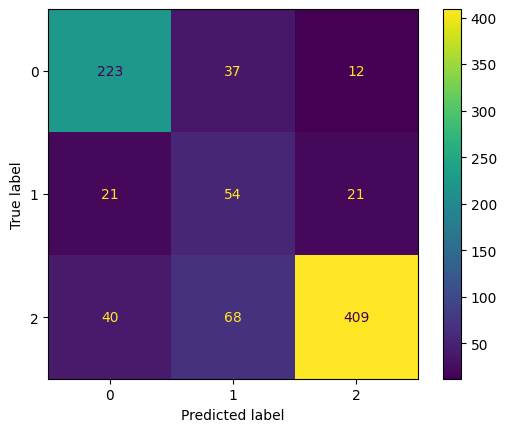

In [22]:
print(pd.DataFrame(grid_rf1.cv_results_)["mean_test_roco"].sort_values(ascending=False).head(7))
display(pd.DataFrame(grid_rf1.cv_results_).sort_values("mean_test_roco", ascending=False).head().filter(regex='^mean',axis=1))

display(grid_rf1.best_estimator_.get_params()["clf"].get_params())

print(classification_report(grid_rf1.predict(Xte1), yte1))

cm1 = metrics.confusion_matrix(grid_rf1.predict(Xte1), yte1)
print(cm1)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = [0,1,2])

cm_display.plot()
plt.show()

> ## LGBM

In [23]:
lg1 = imbpipeline(steps=[
    ("clf", LGBMClassifier(random_state=0))
])


param_grid = {
    'clf__learning_rate': [0.01],
    'clf__n_estimators': [200],
    'clf__max_depth': [None],
#     'clf__min_child_samples': [2],
#     'clf__colsample_bytree': [0.5],
#     'clf__num_leaves':[5]
    
}


# grid_rf1 = GridSearchCV(estimator=rf1, param_grid=param_grid, cv=rkf, 
#                          scoring={"roc": "roc_auc_ovo"}, 
#                          verbose = 3, refit="roc")

grid_lg1 = RandomizedSearchCV(estimator=lg1, param_distributions=param_grid, cv=rkf, 
                              scoring={"f1M": "f1_macro","acc":"accuracy", "roco": "roc_auc_ovo", "rocr": "roc_auc_ovr"}, 
                              verbose = 3, refit="roco", n_iter=20)


# Melakukan tuning hyperparameter
grid_lg1.fit(X1, y1)

# Mendapatkan model terbaik
print("Best Parameter", grid_lg1.best_params_)
print("Best Scorer", grid_lg1.best_score_)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits
[CV 1/6] END clf__learning_rate=0.01, clf__max_depth=None, clf__n_estimators=200; acc: (test=0.762) f1M: (test=0.665) roco: (test=0.890) rocr: (test=0.904) total time=   4.2s
[CV 2/6] END clf__learning_rate=0.01, clf__max_depth=None, clf__n_estimators=200; acc: (test=0.744) f1M: (test=0.655) roco: (test=0.850) rocr: (test=0.865) total time=   4.6s
[CV 3/6] END clf__learning_rate=0.01, clf__max_depth=None, clf__n_estimators=200; acc: (test=0.749) f1M: (test=0.655) roco: (test=0.855) rocr: (test=0.872) total time=   5.4s
[CV 4/6] END clf__learning_rate=0.01, clf__max_depth=None, clf__n_estimators=200; acc: (test=0.768) f1M: (test=0.682) roco: (test=0.863) rocr: (test=0.880) total time=   4.3s
[CV 5/6] END clf__learning_rate=0.01, clf__max_depth=None, clf__n_estimators=200; acc: (test=0.759) f1M: (test=0.669) roco: (test=0.864) rocr: (test=0.878) total time=   4.1s
[CV 6/6] END clf__learning_rate=0.01, clf__max_depth=None, clf__n_

0    0.863447
Name: mean_test_roco, dtype: float64


,mean_fit_time,mean_score_time,mean_test_f1M,mean_test_acc,mean_test_roco,mean_test_rocr
0,4.382591,0.050702,0.662944,0.755155,0.863447,0.87894


{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.01,
 'max_depth': None,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 200,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 0,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       257
           1       0.38      0.54      0.45       112
           2       0.92      0.79      0.85       516

    accuracy                           0.78       885
   macro avg       0.69      0.73      0.70       885
weighted avg       0.81      0.78      0.79       885

[[218  27  12]
 [ 28  61  23]
 [ 38  71 407]]


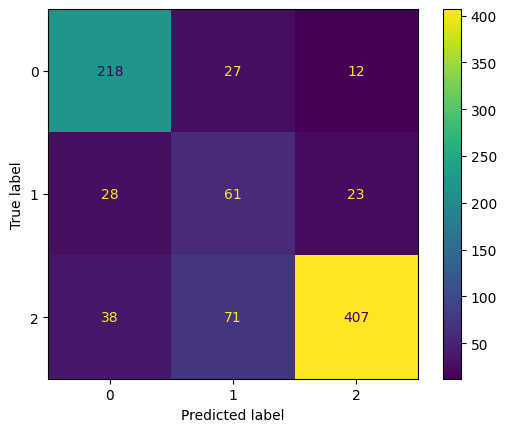

In [24]:
print(pd.DataFrame(grid_lg1.cv_results_)["mean_test_roco"].sort_values(ascending=False).head(7))
display(pd.DataFrame(grid_lg1.cv_results_).sort_values("mean_test_roco", ascending=False).head().filter(regex='^mean',axis=1))

display(grid_lg1.best_estimator_.get_params()["clf"].get_params())

print(classification_report(grid_lg1.predict(Xte1), yte1))

cm1 = metrics.confusion_matrix(grid_lg1.predict(Xte1), yte1)
print(cm1)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = [0,1,2])

cm_display.plot()
plt.show()

> ## HGBoosting

In [25]:
hg1 = imbpipeline(steps=[
    ("clf", HistGradientBoostingClassifier(random_state=0))
])


param_grid = {
#     'clf__min_samples_leaf':[10],
    'clf__learning_rate': [0.01],
    'clf__max_bins': [100],
#     'clf__max_depth': [3],
#     'clf__l2_regularization':[1]
    
}


# grid_rf1 = GridSearchCV(estimator=rf1, param_grid=param_grid, cv=rkf, 
#                          scoring={"roc": "roc_auc_ovo"}, 
#                          verbose = 3, refit="roc")

grid_hg1 = RandomizedSearchCV(estimator=hg1, param_distributions=param_grid, cv=rkf, 
                              scoring={"f1M": "f1_macro","acc":"accuracy", "roco": "roc_auc_ovo", "rocr": "roc_auc_ovr"}, 
                              verbose = 3, refit="roco", n_iter=20)


# Melakukan tuning hyperparameter
grid_hg1.fit(X1, y1)

# Mendapatkan model terbaik
print("Best Parameter", grid_hg1.best_params_)
print("Best Scorer", grid_hg1.best_score_)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits
[CV 1/6] END clf__learning_rate=0.01, clf__max_bins=100; acc: (test=0.763) f1M: (test=0.665) roco: (test=0.886) rocr: (test=0.900) total time=   1.4s
[CV 2/6] END clf__learning_rate=0.01, clf__max_bins=100; acc: (test=0.744) f1M: (test=0.649) roco: (test=0.848) rocr: (test=0.864) total time=   1.4s
[CV 3/6] END clf__learning_rate=0.01, clf__max_bins=100; acc: (test=0.749) f1M: (test=0.644) roco: (test=0.854) rocr: (test=0.871) total time=   1.4s
[CV 4/6] END clf__learning_rate=0.01, clf__max_bins=100; acc: (test=0.758) f1M: (test=0.664) roco: (test=0.863) rocr: (test=0.880) total time=   1.4s
[CV 5/6] END clf__learning_rate=0.01, clf__max_bins=100; acc: (test=0.762) f1M: (test=0.668) roco: (test=0.865) rocr: (test=0.879) total time=   1.4s
[CV 6/6] END clf__learning_rate=0.01, clf__max_bins=100; acc: (test=0.751) f1M: (test=0.647) roco: (test=0.856) rocr: (test=0.871) total time=   1.4s
Best Parameter {'clf__max_bins': 100, 'cl

0    0.861869
Name: mean_test_roco, dtype: float64


,mean_fit_time,mean_score_time,mean_test_f1M,mean_test_acc,mean_test_roco,mean_test_rocr
0,1.297255,0.107485,0.656164,0.754308,0.861869,0.877525


{'categorical_features': None,
 'class_weight': None,
 'early_stopping': 'auto',
 'interaction_cst': None,
 'l2_regularization': 0.0,
 'learning_rate': 0.01,
 'loss': 'log_loss',
 'max_bins': 100,
 'max_depth': None,
 'max_iter': 100,
 'max_leaf_nodes': 31,
 'min_samples_leaf': 20,
 'monotonic_cst': None,
 'n_iter_no_change': 10,
 'random_state': 0,
 'scoring': 'loss',
 'tol': 1e-07,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       262
           1       0.33      0.55      0.41        95
           2       0.93      0.78      0.85       528

    accuracy                           0.77       885
   macro avg       0.67      0.72      0.68       885
weighted avg       0.82      0.77      0.79       885

[[217  32  13]
 [ 26  52  17]
 [ 41  75 412]]


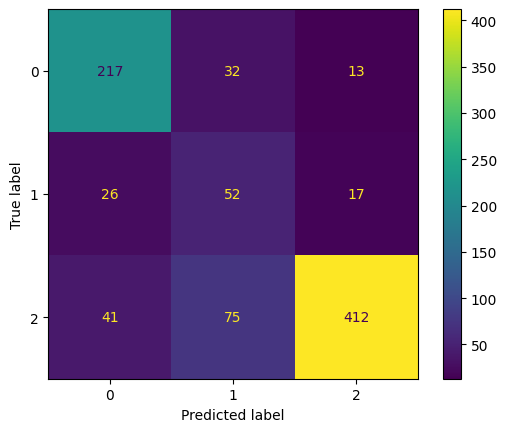

In [26]:
print(pd.DataFrame(grid_hg1.cv_results_)["mean_test_roco"].sort_values(ascending=False).head(7))
display(pd.DataFrame(grid_hg1.cv_results_).sort_values("mean_test_roco", ascending=False).head().filter(regex='^mean',axis=1))

display(grid_hg1.best_estimator_.get_params()["clf"].get_params())

print(classification_report(grid_hg1.predict(Xte1), yte1))

cm1 = metrics.confusion_matrix(grid_hg1.predict(Xte1), yte1)
print(cm1)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = [0,1,2])

cm_display.plot()
plt.show()

In [27]:


# param_grid = {

# }

# grid_hg1 = RandomizedSearchCV(estimator=hg1, param_distributions=param_grid, cv=rkf, 
#                               scoring={"roc": "roc_auc"}, 
#                               verbose = 3, refit="roc", random_state=0, n_iter=200)

# # Melakukan tuning hyperparameter
# grid_hg1.fit(X1, y1)

# # Mendapatkan model terbaik
# print("Best Parameter", grid_hg1.best_params_)
# print("Best Scorer", grid_hg1.best_score_)

### Eval

In [28]:
df1.Target.unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

[[223  21  40]
 [ 37  54  68]
 [ 12  21 409]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       284
           1       0.56      0.34      0.42       159
           2       0.79      0.93      0.85       442

    accuracy                           0.78       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.76      0.78      0.76       885



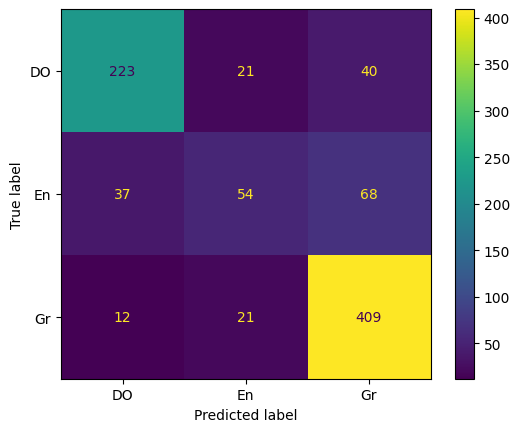

In [29]:
cmrf1 = metrics.confusion_matrix(y_true=yte1, y_pred=grid_rf1.predict(Xte1))
print(cmrf1)

print(metrics.classification_report(y_true=yte1, y_pred=grid_rf1.predict(Xte1)))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cmrf1, display_labels = ["DO","En","Gr"])

cm_display.plot()
plt.show()

In [30]:
# akurasi DO
metrics.accuracy_score(yte1==0,  grid_rf1.predict(Xte1)==0)

# metrics.recall_score(yte1==0,  grid_rf1.predict(Xte1)==0)

0.8757062146892656

In [31]:
# roc semua
print(metrics.roc_auc_score(yte1, grid_rf1.predict_proba(Xte1), multi_class="ovo"))

# roc DO
display(metrics.roc_auc_score(yte1==0,  grid_rf1.predict_proba(Xte1)[:,0]))

0.8811775496362065


0.9259713857186379

### Multiclass to Binary: Moving Average

## Feature Importance and Performance Test Set
**Best Model: RF**

### In-Model FI

### Permutation Importance
1. need remodelling (no need)
1. cant do in grid search or pipelines (can do)
1. yeah, better than In-Model Imp.

In [32]:
from sklearn.inspection import permutation_importance
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [33]:
# X_train2, X_uji2, y_train2, y_uji2 = train_test_split(X_uji, y_uji, test_size = 0.2, random_state = 0, stratify=y_uji)
# X_test.shape

Glyph 9 (	) missing from current font.
The figure layout has changed to tight
Glyph 9 (	) missing from current font.


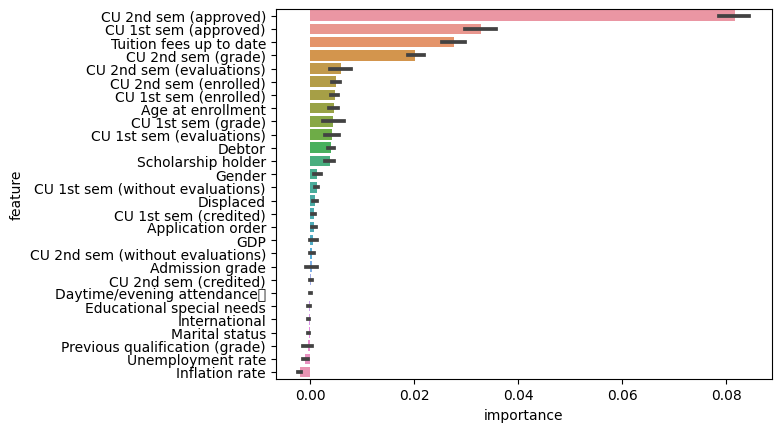

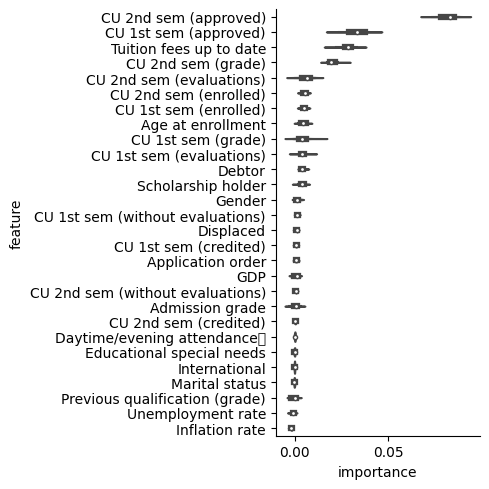

In [34]:
perm = permutation_importance(grid_rf1, Xte1, yte1, n_repeats=10, random_state=0)
# sns.boxplot(perm["importances"].transpose())
# plt.show()

perm2 = pd.DataFrame({'feature': Xte1.columns.tolist()*10, 
                     'importance': perm["importances"].transpose().reshape(-1)})

sns.barplot(x='importance', y='feature', data=perm2, 
            order=perm2.groupby("feature").mean().sort_values("importance", ascending=False).index)

sns.catplot(x='importance', y='feature', data=perm2, kind="violin",
            order=perm2.groupby("feature").mean().sort_values("importance", ascending=False).index)

plt.show()

In [35]:
## Next Move?
fitur2 = (perm2.groupby("feature")["importance"].mean().sort_values(ascending=False)[:10]).index.to_list()
fitur2

['CU 2nd sem (approved)',
 'CU 1st sem (approved)',
 'Tuition fees up to date',
 'CU 2nd sem (grade)',
 'CU 2nd sem (evaluations)',
 'CU 2nd sem (enrolled)',
 'CU 1st sem (enrolled)',
 'Age at enrollment',
 'CU 1st sem (grade)',
 'CU 1st sem (evaluations)']

In [36]:
print(classification_report(grid_rf1.predict(Xte1), yte1))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       272
           1       0.34      0.56      0.42        96
           2       0.93      0.79      0.85       517

    accuracy                           0.78       885
   macro avg       0.68      0.72      0.69       885
weighted avg       0.82      0.78      0.79       885



In [37]:
# takes yearssssssssss.
def mo_data(model, data, pre="preprocess", clf="clf"):
    fitur = model.best_estimator_.named_steps[clf].feature_names_in_
    mod = model.best_estimator_.named_steps[clf]
    dat = pd.DataFrame(data, columns=fitur)
    return mod, dat

    
def id_shap2(model, data, pre="preprocess", clf="clf", en = 1):
    mod, dat = mo_data(model, data)
    
    # individual
    datn = dat.iloc[(en-1):en,:]
    explainer = shap.TreeExplainer(mod, approximate=False)
    shap_values = explainer.shap_values(datn)
    shap.force_plot(explainer.expected_value[0], shap_values[0], datn, matplotlib=True, show=False, contribution_threshold=0.1)

In [38]:
yte1.value_counts()/yte1.shape

Target
2    0.499435
0    0.320904
1    0.179661
Name: count, dtype: float64

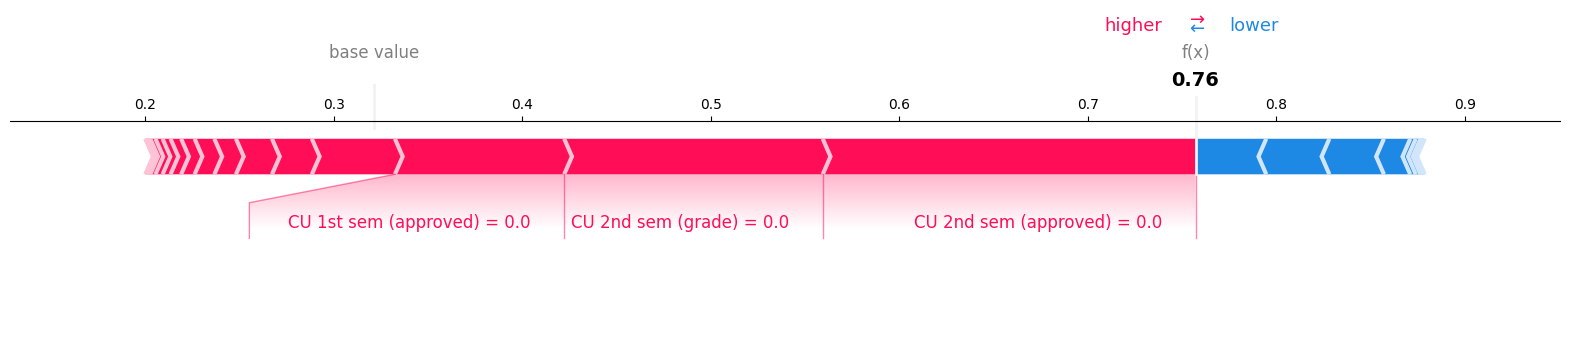

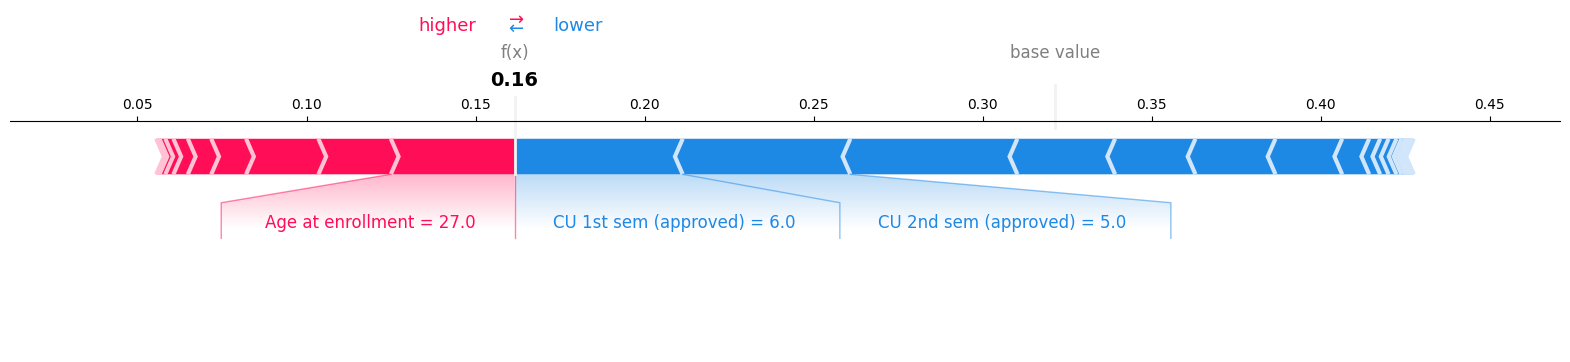

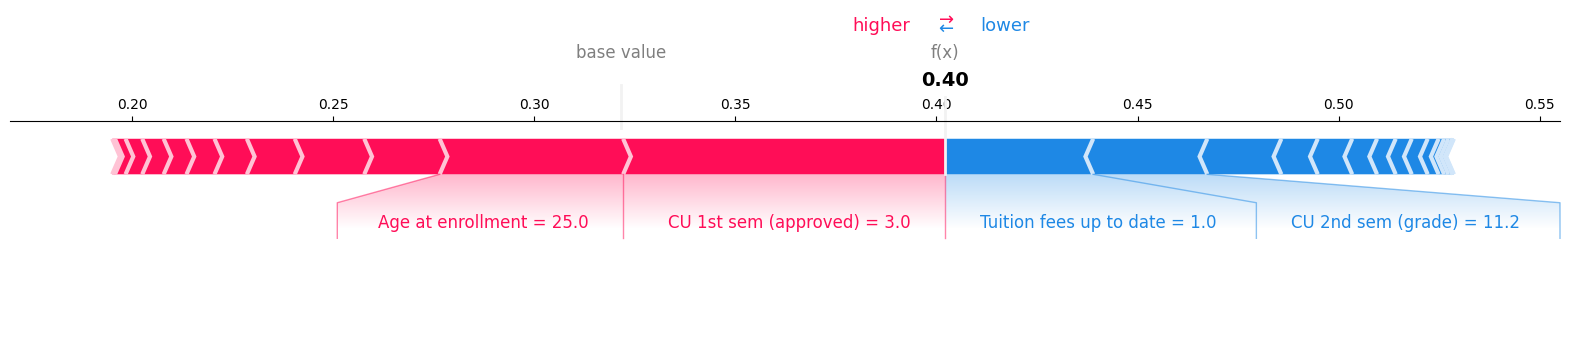

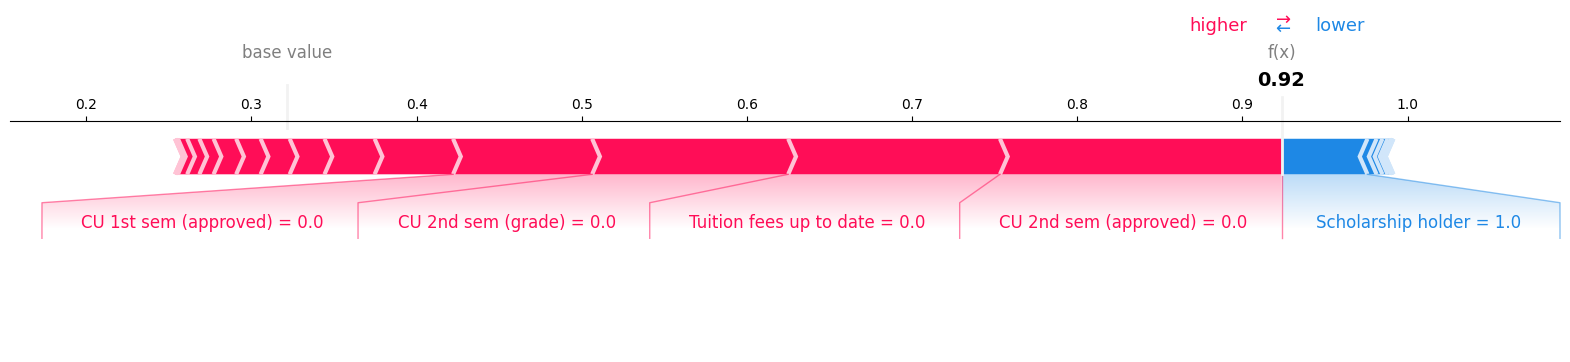

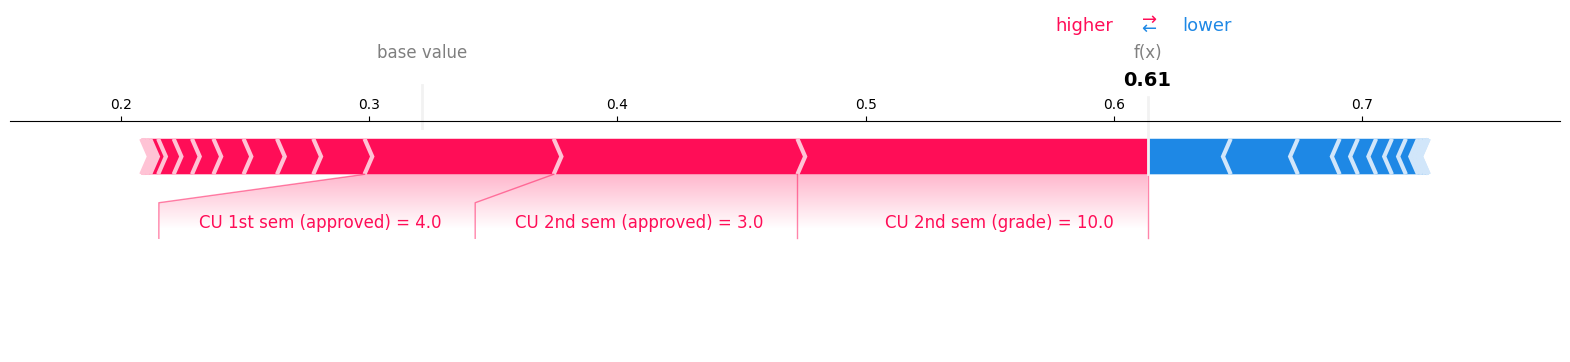

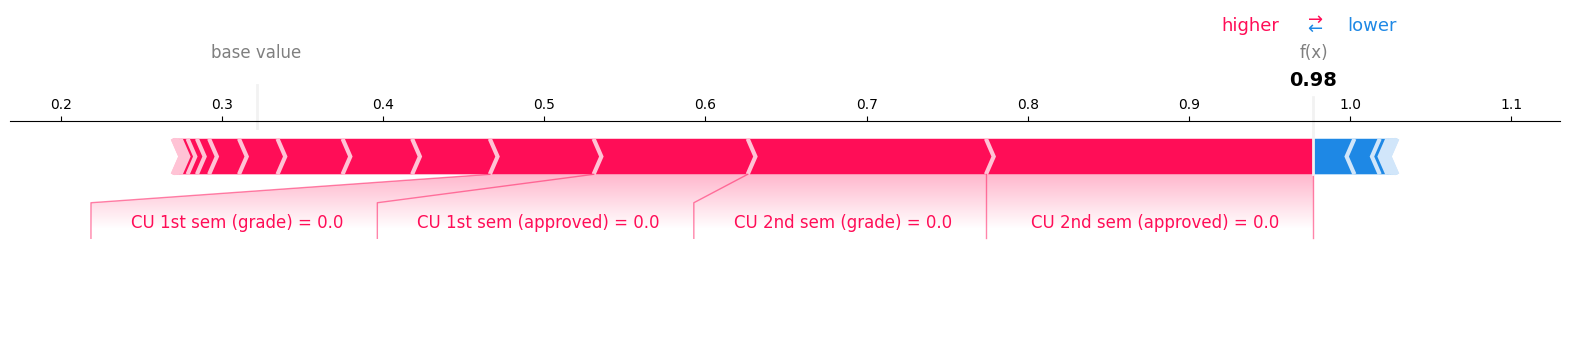

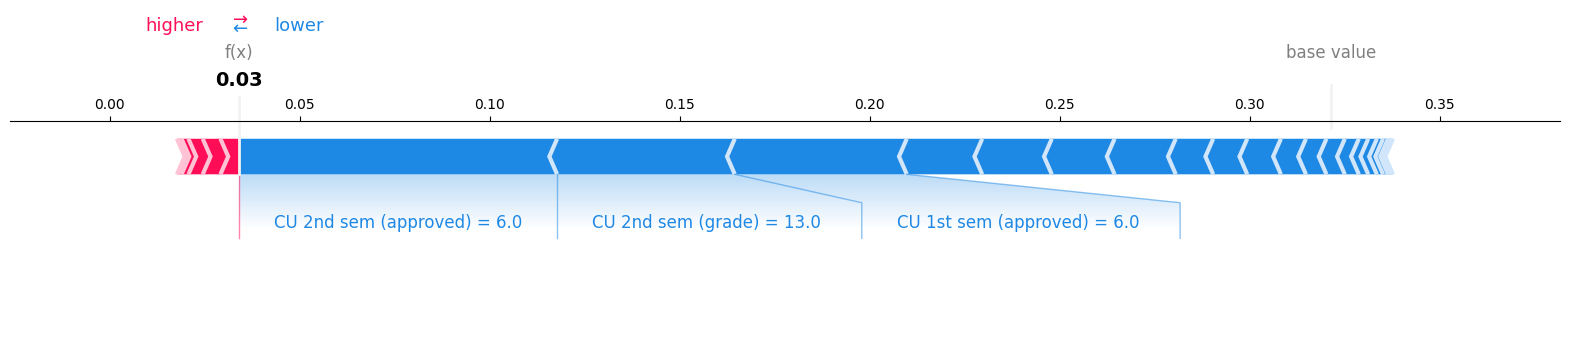

In [39]:
for j in range(3,10):
    id_shap2(grid_rf1, Xte1, en=j)
    
plt.show()
plt.tight_layout()

### General Shap Values
- shap dep. plots; cant say anything tho.
- do, DO redo.

In [40]:
Xtr2, Xte2, ytr2, yte2 = train_test_split(Xte1, yte1, test_size = 0.2, random_state = 0, stratify=yte1)
yte2.shape

(177,)

In [41]:
# zero for DO
def id_shap1(model, data, pre="preprocess", clf="clf", which="all"):
    mod, dat = mo_data(model, data)
    shapval = shap.TreeExplainer(mod, approximate=True).shap_values(dat)
    return shapval[0], dat

def pl_shap1(val, data):
    shap.summary_plot(val, data)
    shap.summary_plot(val, data, plot_type="violin", color='coolwarm')

def pl_shap2(val, data):
    fig, axes = plt.subplots(3, 4, figsize=(16, 10))
    axes = axes.ravel()
    display(axes)

    for i, var in enumerate(fitur2):
        shap.dependence_plot(var, val, data, ax=axes[i], show=False)   
    plt.tight_layout()

valx, datx = id_shap1(grid_rf1, Xte2)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
The figure layout has changed to tight


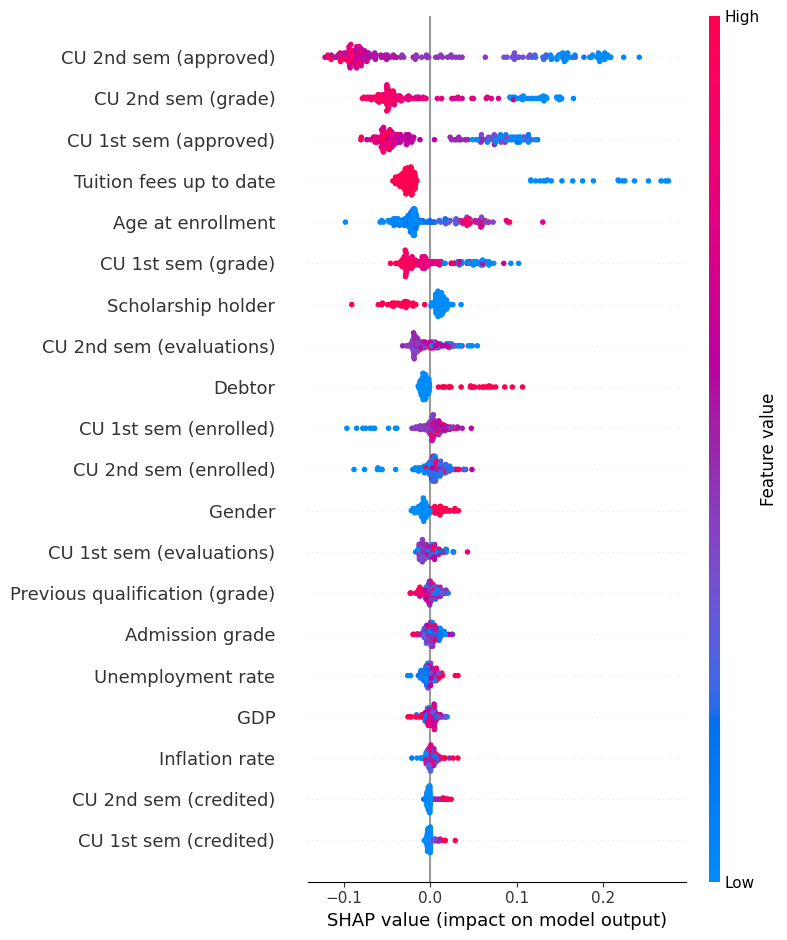

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


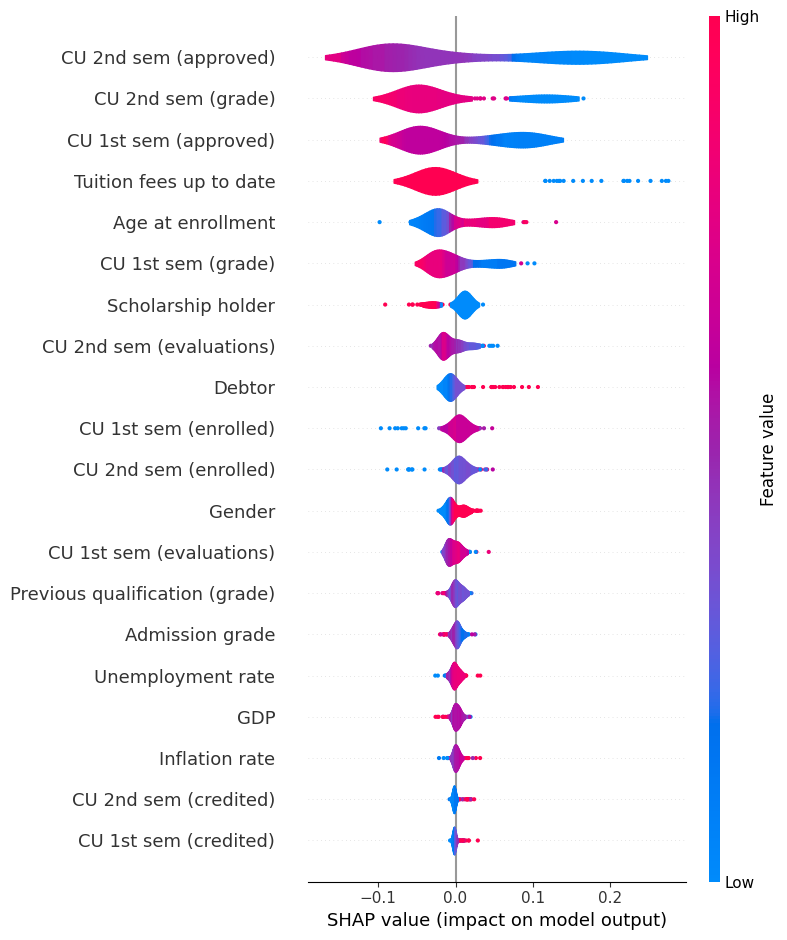

In [42]:
pl_shap1(valx, datx)
plt.show()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

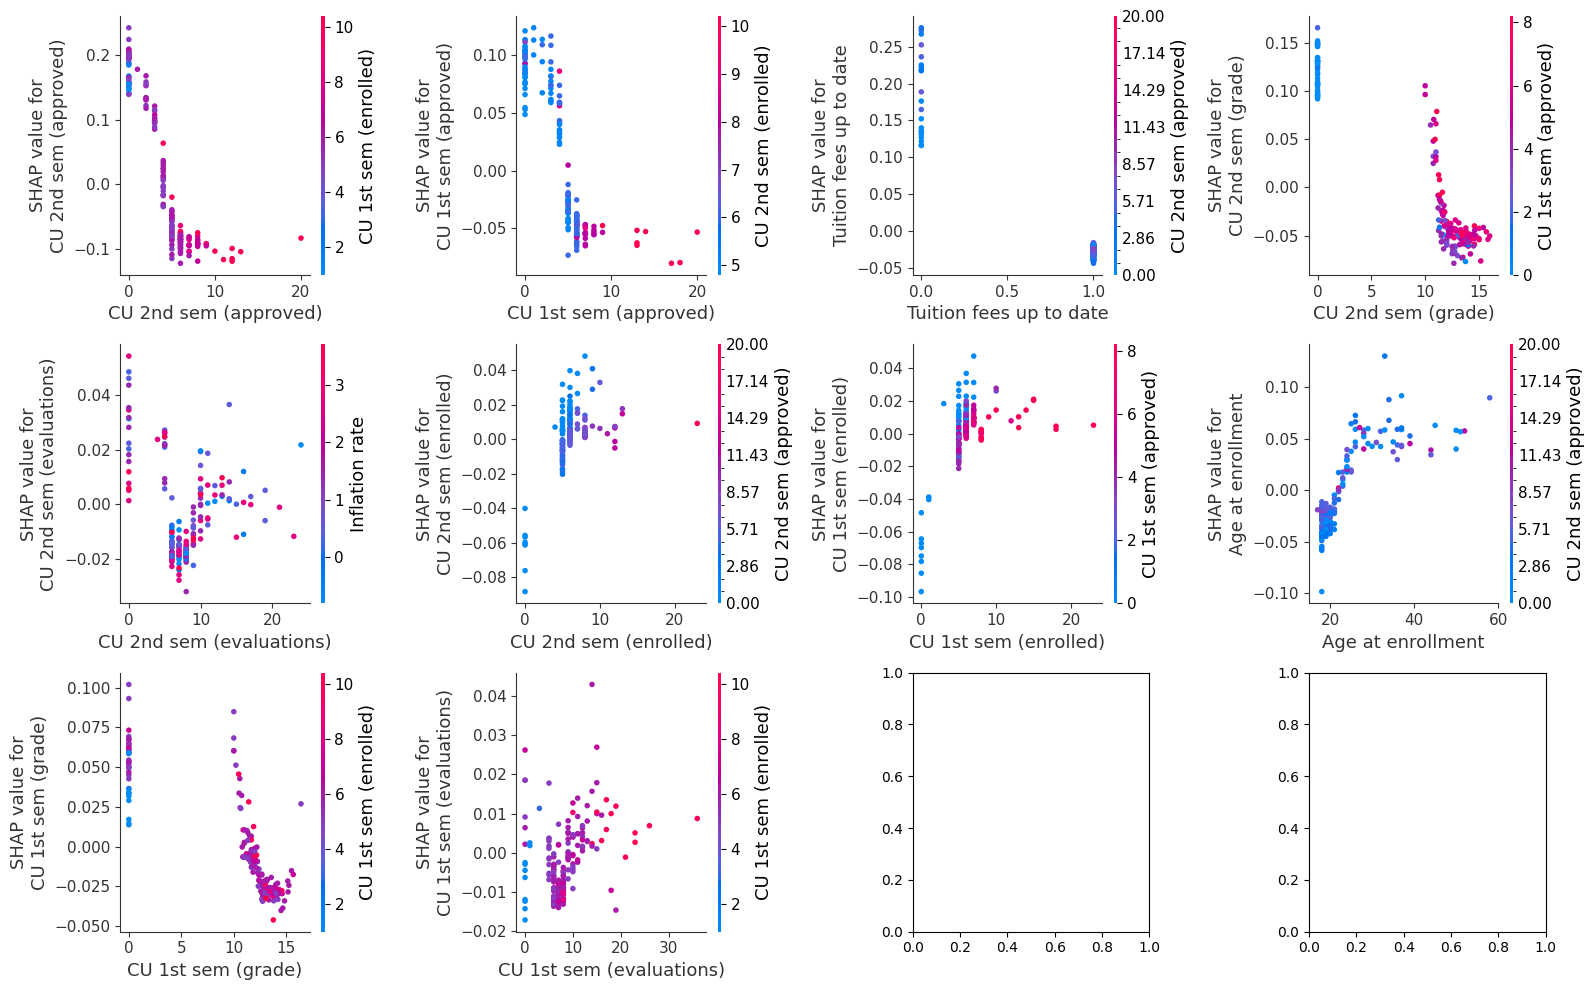

In [43]:
pl_shap2(valx, datx)
plt.show()

BATAS SUCI 1

In [44]:
# X2 = Xtr2.copy()
# y2 = ytr2.copy()

# # Define a list of regression models
# models = [
#     LogisticRegression(random_state=0, max_iter=500),
#     RidgeClassifier(random_state=0),
#     RandomForestClassifier(random_state=0),
#     XGBClassifier(random_state=0),
#     HistGradientBoostingClassifier(random_state=0),
#     LGBMClassifier(random_state=0),
# ]

# res2 = []

# for model in models:
#     pipa = imbpipeline(steps=[
# #         ("preprocess", pre_1),
#         ("clf", model)
#     ])
    
#     # weit, how to do? try append for dataframe
#     grid_search = GridSearchCV(estimator=pipa, param_grid = {}, cv=rkf, scoring={"f1M": "f1_macro","pre":"precision", "roc": "roc_auc"}, refit="pre", verbose=1)
    
#     grid_search.fit(X2, y2)
    
#     # Save the model's performance metrics in a dictionary
#     result = {
#         'Model': type(model).__name__,
#         'Score': grid_search.best_score_
#     }
    
#     # Append the dictionary to the results list
#     res2.append(result)

In [45]:
# print(classification_report(grid_search.predict(Xte2), yte2))
# res2

In [46]:
# xgb1 = imbpipeline(steps=[
# #     ("preprocess", pre_1),
#     ("clf", XGBClassifier(random_state=0))
# ])


# param_grid = {
#     'clf__n_estimators': [500],
#     'clf__learning_rate': [ 0.01], 
#     'clf__max_depth': [2],
#     'clf__gamma': [1],
#     'clf__min_child_weight': [2],
    
# }


# grid_xgb1 = GridSearchCV(estimator=xgb1, param_grid=param_grid, cv=rkf, 
#                          scoring={"roc": "roc_auc"}, 
#                          verbose = 3, refit="roc")


# # Melakukan tuning hyperparameter
# grid_xgb1.fit(X1, y1)


# # Mendapatkan model terbaik
# print("Best Parameter", grid_xgb1.best_params_)
# print("Best Scorer", grid_xgb1.best_score_)

In [47]:
# print(pd.DataFrame(grid_xgb1.cv_results_)["mean_test_roc"].sort_values(ascending=False).head(7))
# pd.DataFrame(grid_xgb1.cv_results_).sort_values("mean_test_roc", ascending=False).head().filter(regex='^param',axis=1)

# grid_xgb1.best_estimator_.get_params()["clf"].get_params()

In [48]:
# rf2 = imbpipeline(steps=[
# #     ("preprocess", pre_1),
#     ("clf", RandomForestClassifier(random_state=0))
# ])


# param_grid = {
# #     'clf__n_estimators': [100],
# #     'clf__min_samples_split': [10],
# #     'clf__min_samples_leaf': [2],
# #     'clf__max_features': ["sqrt"],
# #     'clf__max_depth': [20],

# }

# grid_rf2 = GridSearchCV(estimator=rf2, param_grid=param_grid, cv=rkf, 
#                         scoring={"roc": "roc_auc"}, 
#                         verbose = 3, refit="roc")


# # Melakukan tuning hyperparameter
# grid_rf2.fit(X2, y2)


# # Mendapatkan model terbaik
# print("Best Parameter", grid_rf2.best_params_)
# print("Best Scorer", grid_rf2.best_score_)

In [49]:
# print(pd.DataFrame(grid_rf1.cv_results_)["mean_test_roc"].sort_values(ascending=False).head(7))
# pd.DataFrame(grid_rf1.cv_results_).sort_values("mean_test_roc", ascending=False).head().filter(regex='^param',axis=1)

# grid_rf1.best_estimator_.get_params()["clf"].get_params()

In [50]:
# lg1 = imbpipeline(steps=[
# #     ("preprocess", pre_1),
#     ("clf", LGBMClassifier(random_state=0))
# ])


# param_grid = {
#     'clf__learning_rate': [0.01],
#     'clf__n_estimators': [500],
#     'clf__max_depth': [2],
#     'clf__min_child_samples': [2],
#     'clf__colsample_bytree': [0.5],
#     'clf__num_leaves':[5]
# }


# grid_lg1 = GridSearchCV(estimator=lg1, param_grid=param_grid, cv=rkf, 
#                         scoring={"roc": "roc_auc"}, 
#                         verbose = 3, refit="roc")

# # Melakukan tuning hyperparameter
# grid_lg1.fit(X1, y1)

# # Mendapatkan model terbaik
# print("Best Parameter", grid_lg1.best_params_)
# print("Best Scorer", grid_lg1.best_score_)

In [51]:
# # print(pd.DataFrame(grid_lg1.cv_results_)["mean_test_roc"].sort_values(ascending=False).head(7))
# # pd.DataFrame(grid_lg1.cv_results_).sort_values("mean_test_roc", ascending=False).head().filter(regex='^param',axis=1)

# grid_lg1.best_estimator_.get_params()["clf"].get_params()

In [52]:
# hg1 = imbpipeline(steps=[
# #     ("preprocess", pre_1),
#     ("clf", HistGradientBoostingClassifier(random_state=0))
# ])

# param_grid = {
#     'clf__min_samples_leaf':[10],
#     'clf__learning_rate': [0.05],
#     'clf__max_bins': [200],
#     'clf__max_depth': [3],
#     'clf__l2_regularization':[1]
# }

# grid_hg1 = RandomizedSearchCV(estimator=hg1, param_distributions=param_grid, cv=rkf, 
#                               scoring={"roc": "roc_auc"}, 
#                               verbose = 3, refit="roc", random_state=0, n_iter=200)

# # Melakukan tuning hyperparameter
# grid_hg1.fit(X1, y1)

# # Mendapatkan model terbaik
# print("Best Parameter", grid_hg1.best_params_)
# print("Best Scorer", grid_hg1.best_score_)

In [53]:
# # print(pd.DataFrame(grid_hg1.cv_results_)["mean_test_roc"].sort_values(ascending=False).head(7))
# # pd.DataFrame(grid_hg1.cv_results_).sort_values("mean_test_roc", ascending=False).head().filter(regex='^param',axis=1)

# grid_hg1.best_estimator_.get_params()["clf"].get_params()

## Feature Importance and Performance Test Set
**Best Model: LGBM**

### In-Model FI

In [54]:

# fitur = [j.split("__")[1] for j in grid_lg1.best_estimator_.named_steps["preprocess"].get_feature_names_out()]
# imp = pd.DataFrame({'feature': fitur, 
#                      'importance': grid_lg1.best_estimator_.named_steps["clf"].feature_importances_})

# imp["importance"] = imp["importance"]/imp["importance"].sum()*100

# imp = imp.sort_values('importance', ascending=False).reset_index(drop=True)

# plt.figure(figsize=(6, 4))
# sns.barplot(x='importance', y='feature', data=imp)

In [55]:
# perm = permutation_importance(grid_rf2, Xte2, yte2, n_repeats=50, random_state=0)
# # sns.boxplot(perm["importances"].transpose())
# # plt.show()

# perm2 = pd.DataFrame({'feature': Xte2.columns.tolist()*50, 
#                      'importance': perm["importances"].transpose().reshape(-1)})

# sns.barplot(x='importance', y='feature', data=perm2, 
#             order=perm2.groupby("feature").mean().sort_values("importance", ascending=False).index)

# sns.catplot(x='importance', y='feature', data=perm2, kind="violin",
#             order=perm2.groupby("feature").mean().sort_values("importance", ascending=False).index)

# plt.show()

In [56]:
# ## Next Move?
# fitur2 = (perm2.groupby("feature")["importance"].mean().sort_values(ascending=False)[:10]).index.to_list()
# # fitur2

### Individual and General Shap Values 
**WAY TOOO LONG**, do resample plz <br>
Couldnt do pipeline and grid search; so manually transform variable, then modelling or what? Yeah, kinda.
- Dari individu uji pertama, didapat bahwa faktor yang paling berpengaruh terhadap nilai G3 adalah G1, absences, dan reason. G1 senilai 8 (yang cukup rendah) serta reason = 0 (dekat dari rumah) menyebabkan turunnya nilai dari G3; absences sebesar 2, yang tidak terlalu banyak, meningkatkan nilai dari G3. Dari ketiga faktor tersebut, rekomendasi untuk anak tersebut adalah mengubah mindset dan meningkatkan ketidakabsenan. (G1 gk bisa diubah, absences juga udh bagus, apalagi dong?).
- Dari SHAP values secara general, G1 dan difG berkorelasi positif dengan respon G3. Absences tampak membagongkan; untuk absen sedikit cenderung jelek. Sedangkan untuk gabungan absen sedikit, menengah, dan banyak cenderung menambah var. respon (ya, sepertinya absen berkorelasi dengan variabel lainnya). Dst. Age dan reason lumayan masuk akal.

In [57]:
# # takes yearssssssssss.
# def mo_data(model, data, pre="preprocess", clf="clf"):
# #     pre = model.best_estimator_.named_steps[pre]
# #     data = pre.transform(data)
# #     fitur = [j.split("__")[1] for j in pre.get_feature_names_out()]
#     fitur = model.best_estimator_.named_steps[clf].feature_names_in_
#     mod = model.best_estimator_.named_steps[clf]
#     dat = pd.DataFrame(data, columns=fitur)
#     return mod, dat

    
# def id_shap2(model, data, pre="preprocess", clf="clf", en = 1):
#     mod, dat = mo_data(model, data)
    
#     # individual
#     datn = dat.iloc[(en-1):en,:]
#     explainer = shap.TreeExplainer(mod, approximate=False)
#     shap_values = explainer.shap_values(datn)
#     return shap.force_plot(explainer.expected_value[1], shap_values[1], datn, matplotlib=True, show=False, contribution_threshold=0.1)

In [58]:
# for j in np.where(grid_rf2.predict_proba(Xte2)[:,1]>0.2)[0][1:10]+1:
#     id_shap2(grid_rf2, Xte2, en=j)

# plt.show()
# plt.tight_layout()

BATAS SUCI 2

### Threshold-Moving
\dibalik

In [59]:
def fLabel(pos_prob, thd):
    return (pos_prob >= thd).astype("int")

def fThresh(X, y, model, kelas=0):
    yprob = model.predict_proba(X)[:,0]
    thresh = np.arange(0, 1, 0.01) #UBAH BUN.
    cm = [confusion_matrix(y==kelas, fLabel(yprob, t)) for t in thresh]
    
    # tn, fp, fn, tp
    am = np.array(cm).reshape((thresh.shape[0],4))[:,0:4]
    matrik = pd.DataFrame(am, columns=["tn", "fp", "fn", "tp"])
    matrik["thresh"] = thresh
    
    # f1 micro dari formula manual, cari max, yyy.
    matrik["acc"] = matrik[["tn", "tp"]].sum(1) /  matrik[["tn", "tp", "fn", "fp"]].sum(1)

    matrik["sen"] = matrik[["tp"]].sum(1) /  matrik[["tp", "fn"]].sum(1)
    matrik["pre"] = matrik[["tp"]].sum(1) /  matrik[["tp", "fp"]].sum(1)
    matrik["spe"] = matrik[["tn"]].sum(1) /  matrik[["tn", "fp"]].sum(1)
    matrik["bal"] = matrik[["sen", "spe"]].mean(1)

    matrik["f1M"] = 2/(1/matrik["sen"] + 1/matrik["pre"])    
    matrik["f50M"] = 1.25/(0.25/matrik["sen"] + 1/matrik["pre"])     
    matrik["f25M"] = (1+.25**2)/(0.25**2/matrik["sen"] + 1/matrik["pre"])
    
#     matrik["pro"] = (matrik[["tn", "fp", "fn", "tp"]]*[10,0,-100,0]).sum(1) / matrik[["tn", "tp", "fn", "fp"]].sum(1)
#     matrik["check-cent"] = 100* matrik[["fp", "tp"]].sum(1) /  matrik[["tn", "tp", "fn", "fp"]].sum(1)
#     matrik["riil-cent"] = 100* matrik[["fn", "tp"]].sum(1) /  matrik[["tn", "tp", "fn", "fp"]].sum(1)
    
    # omit zeros tp and tn
    pos = (matrik["tp"] == 0) + (matrik["tn"] == 0) == False
    
    return matrik.loc[pos,:].sort_values("sen", ascending=False).reset_index(drop=True)

In [60]:
# ekstrem: max profit, max recall/sens, max balanced acc, acc, spe, por eak.
dftm = fThresh(Xte1, yte1, grid_rf1)
tabel = dftm.iloc[[dftm.sen.argmax(), dftm.bal.argmax(), dftm.acc.argmax(), dftm.f50M.argmax(), dftm.f25M.argmax(), dftm.f1M.argmax(), dftm.spe.argmax(), np.where(dftm.thresh==0.5)[0][0]] ,:].sort_values("thresh")
round(tabel, 3)

,tn,fp,fn,tp,thresh,acc,sen,pre,spe,bal,f1M,f50M,f25M
0,19,582,0,284,0.01,0.342,1.000,0.328,0.032,0.516,0.494,0.379,0.341
44,567,34,66,218,0.45,0.887,0.768,0.865,0.943,0.856,0.813,0.844,0.859
46,572,29,69,215,0.47,0.889,0.757,0.881,0.952,0.854,0.814,0.853,0.873
46,572,29,69,215,0.47,0.889,0.757,0.881,0.952,0.854,0.814,0.853,0.873
49,575,26,75,209,0.50,0.886,0.736,0.889,0.957,0.846,0.805,0.854,0.879
64,595,6,103,181,0.65,0.877,0.637,0.968,0.990,0.814,0.769,0.877,0.939
67,597,4,111,173,0.68,0.870,0.609,0.977,0.993,0.801,0.751,0.872,0.944
92,601,0,217,67,0.93,0.755,0.236,1.000,1.000,0.618,0.382,0.607,0.840


In [61]:
dftm[dftm.sen >= 0.8][dftm.pre >= 0.6]

Boolean Series key will be reindexed to match DataFrame index.


,tn,fp,fn,tp,thresh,acc,sen,pre,spe,bal,f1M,f50M,f25M
17,436,165,27,257,0.18,0.783051,0.904930,0.609005,0.725458,0.815194,0.728045,0.651623,0.620949
18,444,157,27,257,0.19,0.792090,0.904930,0.620773,0.738769,0.821849,0.736390,0.662371,0.632455
19,452,149,29,255,0.20,0.798870,0.897887,0.631188,0.752080,0.824984,0.741279,0.671053,0.642413
20,458,143,30,254,0.21,0.804520,0.894366,0.639798,0.762063,0.828215,0.745962,0.678419,0.650693
21,462,139,30,254,0.22,0.809040,0.894366,0.646310,0.768719,0.831542,0.750369,0.684267,0.657030
22,474,127,33,251,0.23,0.819209,0.883803,0.664021,0.788686,0.836244,0.758308,0.698775,0.673879
23,481,120,35,249,0.25,0.824859,0.876761,0.674797,0.800333,0.838547,0.762634,0.707386,0.684066
24,477,124,35,249,0.24,0.820339,0.876761,0.667560,0.793677,0.835219,0.757991,0.701014,0.677063
25,489,112,36,248,0.26,0.832768,0.873239,0.688889,0.813644,0.843442,0.770186,0.719258,0.697551
26,497,104,38,246,0.27,0.839548,0.866197,0.702857,0.826955,0.846576,0.776025,0.730404,0.710741
